<a href="https://colab.research.google.com/github/PPierzc/PracowniaEEG/blob/master/Cw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import copy
import tqdm
import itertools


# Zadanie 1:

### Signal Constructor Functions


---


In [0]:
params = {
'T': 1,
'Fs': 128,
't0' : 0.3,
'sigma' : .02,
}

#### Sin

In [0]:
def sin(f = 1, T = 1, Fs = 128, phi =0, **kwargs):
 
	dt = 1.0/Fs
	x = np.arange(0,T,dt)
	g = np.sin(2*np.pi*f*x + phi)
	return x, g

#### G_1

In [0]:
def  g_1(t0=0, sigma=1, Fs=128, T=1):
#   x = np.arange(0, T, 1/Fs)
#   g = st.norm.pdf(x, loc=t0, scale=sigma)
#   return x, g

  x = np.arange(0, T, 1/Fs)
  g = np.empty(len(x))
  for i,dt in enumerate(x):
    
    g[i] = np.exp(-.5 * (dt - t0)* (dt - t0) / (sigma*sigma) )
    
  return x, g

#### G_2

In [0]:
def g_2(t0=0, sigma=1, Fs=128, T=1):
  
  '''acording to : https://www.wolframalpha.com/input/?i=d%2Fdt+e%5E(-(t-t0)%5E2%2F(2*s%5E2))'''
  x = np.arange(0, T, 1/Fs)
  g = np.empty(len(x))
  
  for i,dt in enumerate(x):
    g[i] = - (dt - t0) * np.exp(-.5 * (dt - t0)* (dt - t0) \
                                / (sigma*sigma) )/(sigma*sigma)
    
    
  return x, g

#### G_3

In [0]:
def g_3(t0=5, sigma=1, Fs=128, T=1):
  x, g = g_1(t0, sigma, Fs, T)
  g[np.where(x < t0)] = 0
  return x, g

#### Noise

In [0]:
def noise(T, Fs, **kwargs):
  x = np.arange(0, T, 1/Fs)
  g = np.random.randn(len(x))
  return x, g

#### Impulse

In [0]:
def impulse(length, x0 = None):
  impulse = np.zeros(length)
  
  if not x0:
    impulse[length // 2] = 1
  else:
    impulse[x0] = 1
    
  return impulse

#### Display Construction Functions

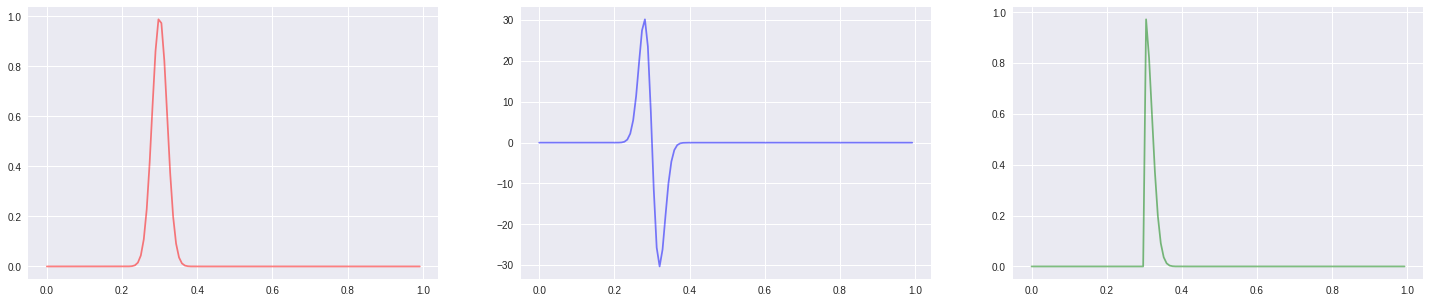

In [22]:
plt.figure(figsize=(25,5))
t,s = g_1(**params)
plt.subplot(1, 3, 1)
plt.plot(t,s, alpha=.5, c='r', label='g_1')

t,s = g_2(**params)
plt.subplot(1, 3, 2)
plt.plot(t,s, alpha=.5, c='b', label='g_2')

t,s = g_3(**params)
plt.subplot(1, 3, 3)
plt.plot(t,s, alpha=.5, c='g', label='g_3')

plt.show()


## Symulacje
---



### Sygnał + Szum

In [0]:
def symulacja(g, N, params):
  x, g = g(**params)
  sims = np.empty((N, len(x)))
  for i in range(N):
    x, g_noise = noise(**params)
    sims[i] = g + g_noise
  return np.var(np.mean(sims, axis=0)), np.var(sims, axis=0)
    

In [0]:
Ns = range(10, 5000, 10)
sims = np.empty((len(Ns)))
for i, N in enumerate(Ns):
  _s, _v = symulacja(g_1, N, params)
  sims[i] = _s

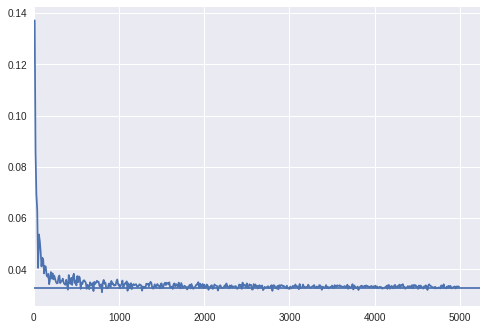

In [35]:
plt.plot(Ns, sims)
plt.axhline(np.var(g_1(**params)[1]))
# plt.axhline(0.0329358, c='r')
plt.xlim((0, None))
plt.show()

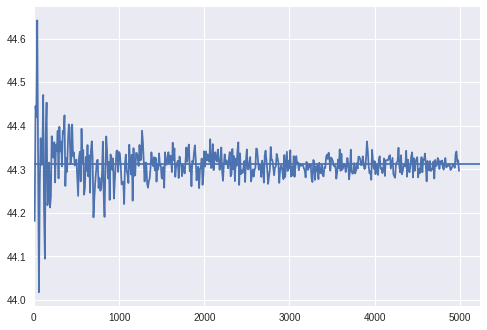

In [37]:
Ns = range(10, 5000, 10)
sims = np.empty((len(Ns)))
for i, N in enumerate(Ns):
  _s, _v = symulacja(g_2, N, params)
  sims[i] = _s
  
plt.plot(Ns, sims)
plt.axhline(np.var(g_2(**params)[1]))
plt.xlim((0, None))
plt.show()

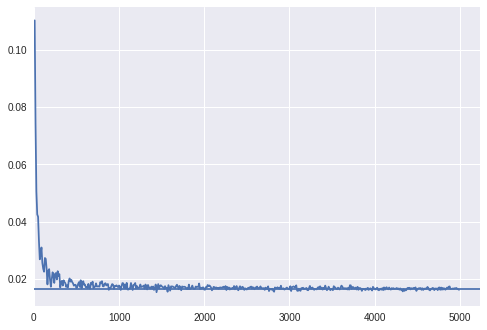

In [38]:
Ns = range(10, 5000, 10)
sims = np.empty((len(Ns)))
for i, N in enumerate(Ns):
  _s, _v = symulacja(g_3, N, params)
  sims[i] = _s
  
plt.plot(Ns, sims)
plt.axhline(np.var(g_3(**params)[1]))
plt.xlim((0, None))
plt.show()

### Sygnał + szum + niezależna czynność rytmiczna

wnioski(in nizsze czestosci tym one sie mniej wysrednia, malo powtorzen - duze skoki, wykresy spadaja jak 1/n wiec git)

In [0]:
def symulacja_sinus(g, N, f, params):
  x, g = g(**params)
  sims = np.empty((N, len(x)))
  for i in range(N):
    x, g_noise = noise(**params)
    x, g_sin = sin(
        phi=np.random.randint(-np.pi, np.pi),
        f=f,
        **params)
    sims[i] = g + g_noise + g_sin
  return np.var(np.mean(sims, axis=0)), np.var(sims, axis=0)

#### Dla G_1

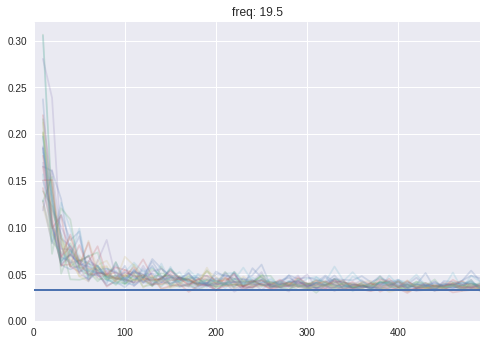

In [31]:
Ns = range(10, 500, 10)
for f in np.arange(5, 20, 0.5):
  sims = np.empty((len(Ns)))
  for i, N in enumerate(Ns):
    _s, _v = symulacja_sinus(g_1, N, f, params)
    sims[i] = _s
  
  plt.plot(Ns, sims, alpha=.2)
  plt.axhline(np.var(g_1(**params)[1]))
plt.xlim((0, max(Ns)))
plt.ylim(0, None)
plt.title(f'freq: {f}')
plt.show()

#### Dla G_2

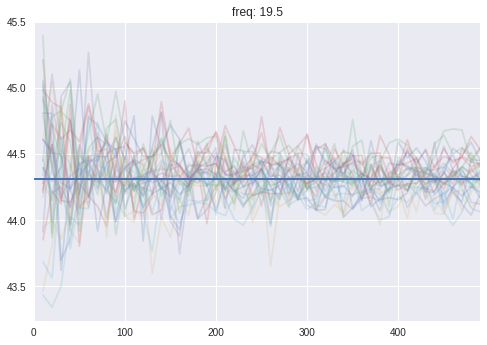

In [33]:
Ns = range(10, 500, 10)
for f in np.arange(5, 20, 0.5):
  sims = np.empty((len(Ns)))
  for i, N in enumerate(Ns):
    _s, _v = symulacja_sinus(g_2, N, f, params)
    sims[i] = _s
  
  plt.plot(Ns, sims, alpha=.2)
  plt.axhline(np.var(g_2(**params)[1]))
plt.xlim((0, max(Ns)))
plt.title(f'freq: {f}')
plt.show()

#### Dla G_3

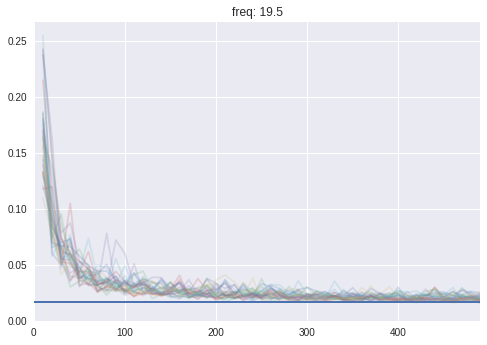

In [34]:
Ns = range(10, 500, 10)
for f in np.arange(5, 20, 0.5):
  sims = np.empty((len(Ns)))
  for i, N in enumerate(Ns):
    _s, _v = symulacja_sinus(g_3, N, f, params)
    sims[i] = _s
  
  plt.plot(Ns, sims, alpha=.2)
  plt.axhline(np.var(g_3(**params)[1]))
plt.xlim((0, max(Ns)))
plt.ylim(0, None)
plt.title(f'freq: {f}')
plt.show()

### Uśrednianie w modelu z resetem fazy (wnioski:)



In [0]:
def sin_reset_phase(f):
  x = np.arange(0, 1, 1/128)
  s = np.empty(len(x))

  half = len(x)//2

  s[:half] = np.sin(2 * np.pi * f * x[:half] + np.random.normal(-np.pi, np.pi))
  s[half:] = np.sin(2 * np.pi * f * x[half:])
  
  return x, s

In [0]:
def get_mean_sin(N, scale):
  sins = np.empty((N, 128))
  x = np.arange(0, 1, 1/128)

  for i, f in enumerate(st.norm.rvs(loc=10, scale=scale, size=N)):
    sins[i] = sin_reset_phase(f)[1]
    
  return x, np.mean(sins, axis=0)

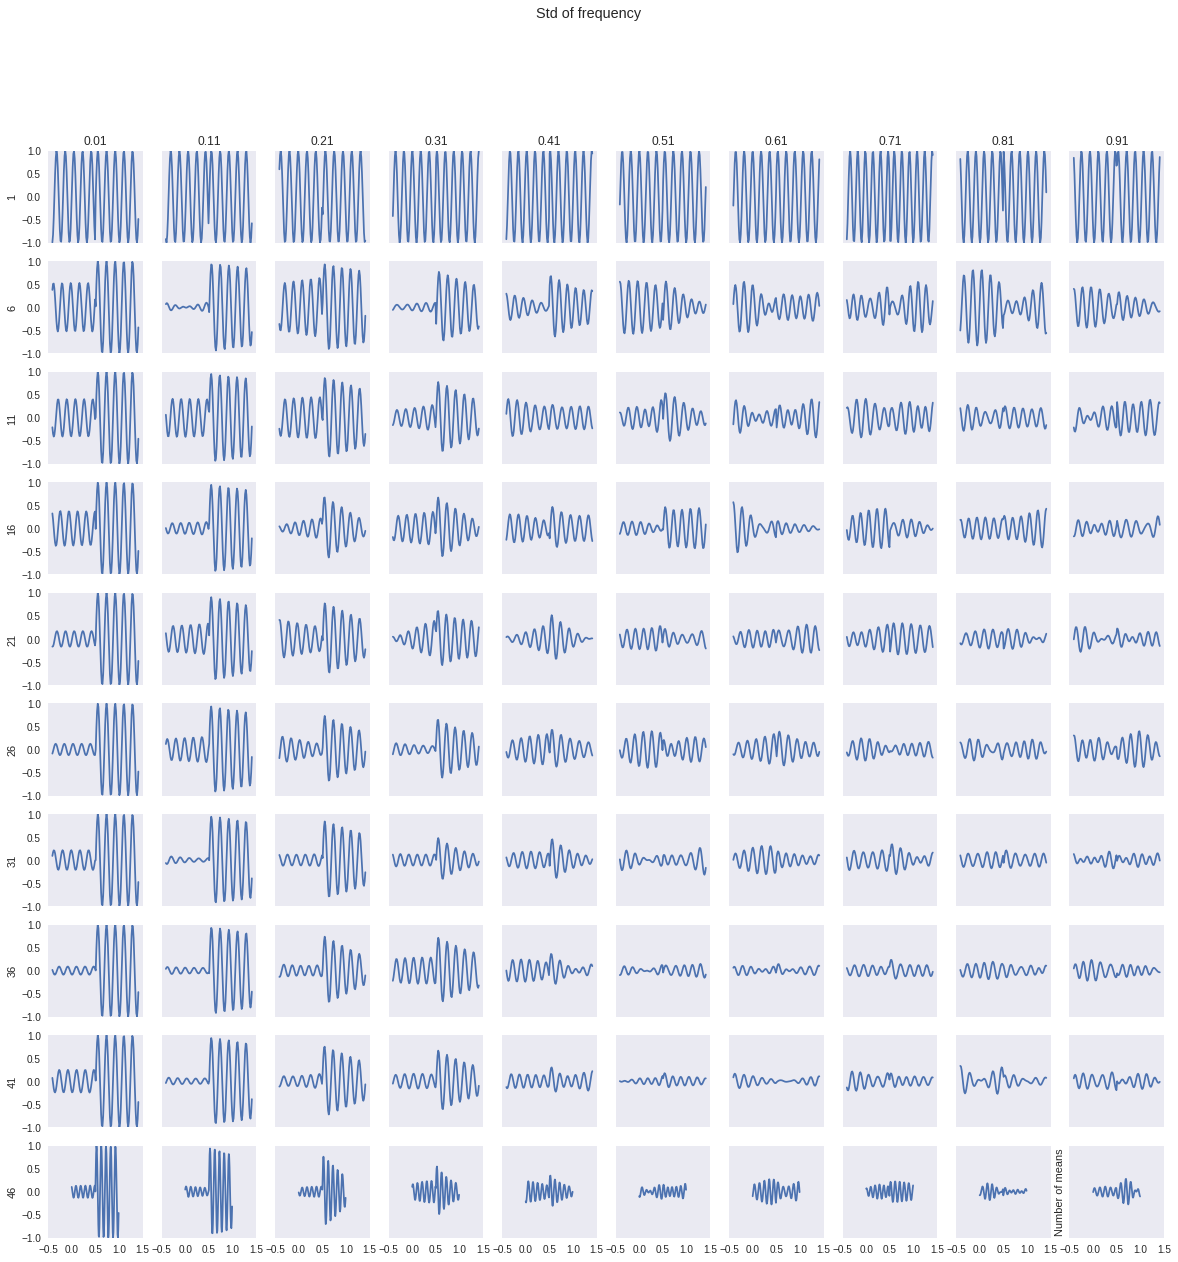

In [40]:
plt.figure(figsize=(20,20))
plt.tight_layout()
N = np.arange(1, 51, 5)
scale = np.arange(0.01, 1, 0.1)

for i, n in enumerate(N):
  for j, s in enumerate(scale):
    pos = (j+1) + (i*len(N))
    plt.subplot(len(scale), len(N), pos)
    plt.plot(*get_mean_sin(n, s))
    plt.ylim(-1, 1)

    xticks = []
    yticks = []

    if not i:
      plt.title(f'{s:.2f}')

    if i == len(N) - 1:
      xticks = plt.xticks()[0]

    if not j:
      plt.ylabel(n)
      yticks = plt.yticks()[0]

    plt.yticks(yticks)
    plt.xticks(xticks)
    plt.grid(False)
    
plt.ylabel('Number of means')
plt.suptitle('Std of frequency')
plt.show()

###Uśrednianie potencjału z fluktuacją latencji

In [0]:
def latency_fluct(g_x, ylim=(0, 1)):
  mean_t0 = .5
  scale = np.arange(0.02, 0.22, 0.02)
  N = np.arange(2, 402, 40)
  params_copy = copy.copy(params)

  plt.figure(figsize=(20,20))
  plt.tight_layout()

  for i, n in enumerate(N):
    for j, s in enumerate(scale):
      pos = (j+1) + (i*len(N))

      sims = []
      for _ in range(n):
        t0 = st.norm.rvs(loc=mean_t0, scale=s)
        params_copy['t0'] = t0
        t, _s = g_x(**params_copy)
        sims.append(_s)

      sim = np.mean(sims, axis=0)

      plt.subplot(len(scale), len(N), pos)
      plt.plot(t, sim)

      xticks = []
      yticks = []

      if not i:
        plt.title(f'{s:.2f}')

      if i == len(N) - 1:
        xticks = plt.xticks()[0]

      if not j:
        plt.ylabel(n)
        yticks = np.arange(-1, 1.5, 0.5)

      plt.yticks(yticks)
      plt.xticks(xticks)
      plt.grid(False)
      plt.ylim(ylim)
      plt.xlim(0, 1)

  plt.ylabel('Number of means')
  plt.suptitle('Std of t0')
  plt.show()

### Latency

#### G_1

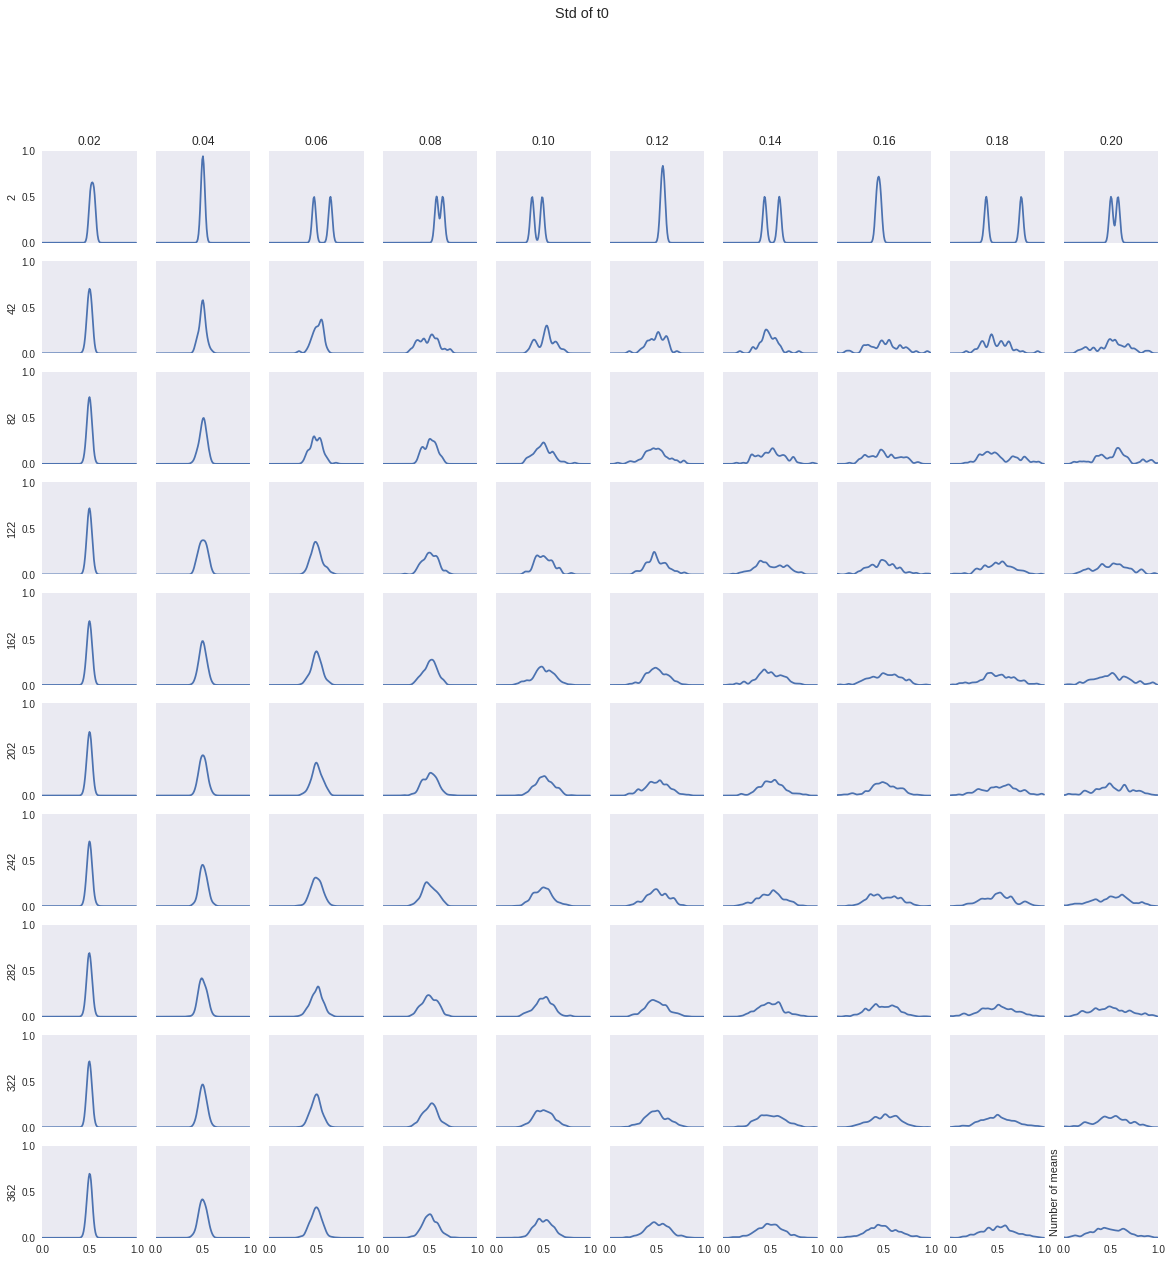

In [102]:
latency_fluct(g_1, (0, 1))

#### G_2




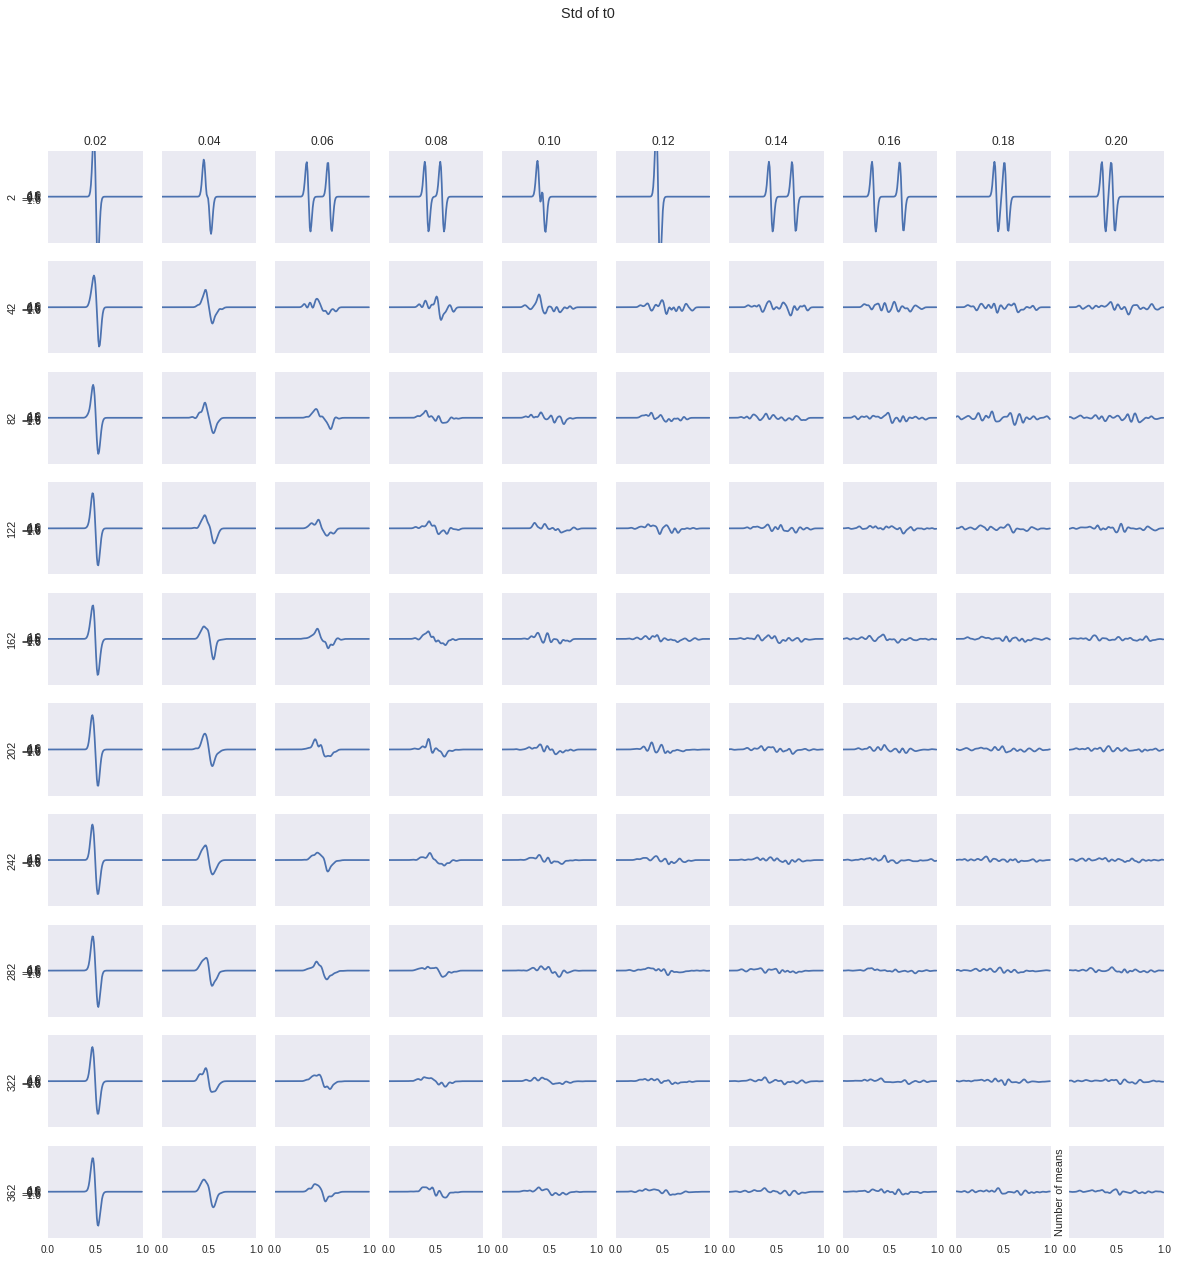

In [103]:
latency_fluct(g_2, (-20, 20))

#### G_3

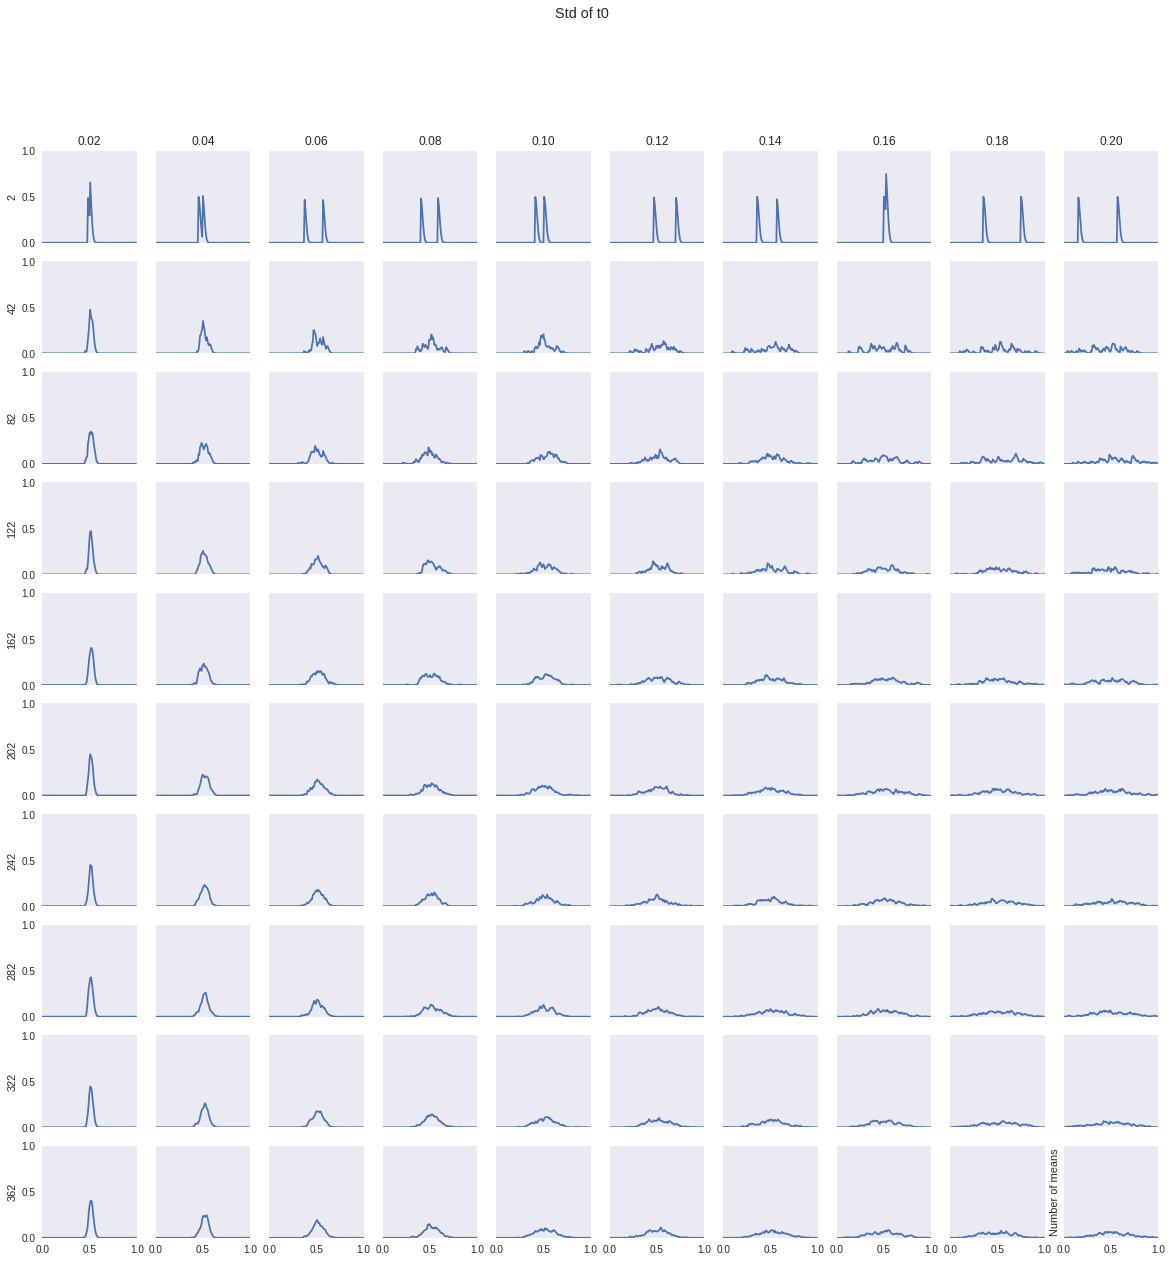

In [104]:
latency_fluct(g_3, (0, 1))

## Filtry

---


#### Filter Definitions

In [0]:
from scipy.signal import butter, filtfilt, iirnotch, freqz, lfilter, cheby2


def _butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = _butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y


def _butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a


def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = _butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y


def notch_filter(data, f0, fs, Q=30):
    nyq = 0.5 * fs
    w0 = f0/nyq
    b, a = iirnotch(w0, Q)
    y = filtfilt(b, a, data)
    return y
  
  
def _cheb2_notch(cutoff, fs, order=5, rs=3, width=.1):
    nq = fs/2
    Wn_min, Wn_max = (cutoff - width) / nq, (cutoff + width) / nq
    Wn = [Wn_min, Wn_max]
    b, a = cheby2(N=order, rs=rs, Wn=Wn, btype='bandstop', analog=False, output='ba')
    return b, a

In [0]:
def filter_test(a, b, f=None, T=1, Fs=128):
    if not f:
      f = np.arange(0.01, Fs/2, 0.01)
    
    t = np.arange(-T, T, 1/Fs)

    w = 2*np.pi* f/Fs

    w, h = freqz(b, a, w)
    
    m = np.abs(h)

    x = impulse(len(t))
    y = lfilter(b,a,x)

    plt.subplot(1,2,1)
    plt.title('moduł transmitancji')
    plt.plot(f, 20*np.log10(m))
    plt.ylabel('[dB]')
    plt.xlabel('f [Hz]')
    plt.grid('on')
  
    plt.subplot(1,2,2)
    plt.title('odpowiedź impulsowa')
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlim([-T,T])
    plt.xlabel('t [s]')
    plt.grid('on')

### Test Filters

In [0]:
def plot_charaktrystkyki(filter_function, cutoffs, orders):
  for cutoff, order in itertools.product(cutoffs, orders):
      b, a = filter_function(cutoff, Fs, order)

      fig = plt.figure(figsize=(20, 3))
      fig.subplots_adjust(hspace=.5)

      filter_test(a, b)
      
      filter_name = filter_function.__name__[1:].replace("_", " ").title()
      plt.suptitle(f'filter: {filter_name}, order: {order}, cuttoff: {cutoff}Hz')
      plt.show()
  

#### Low Pass

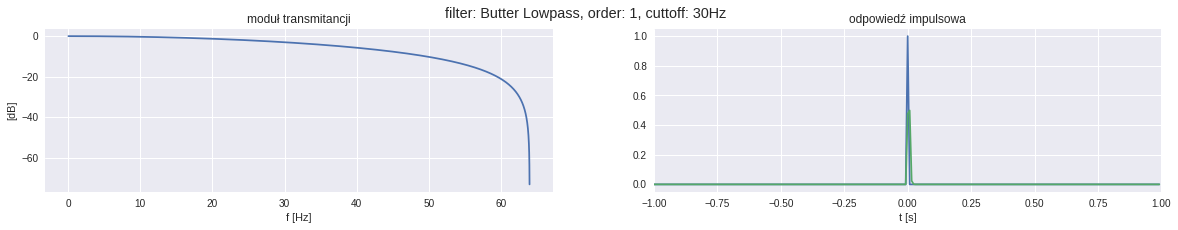

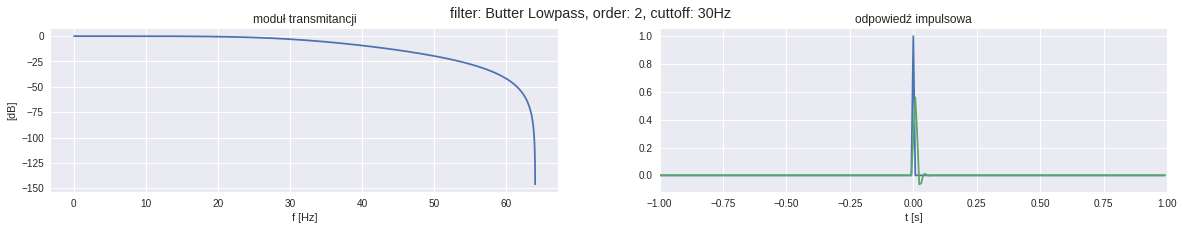

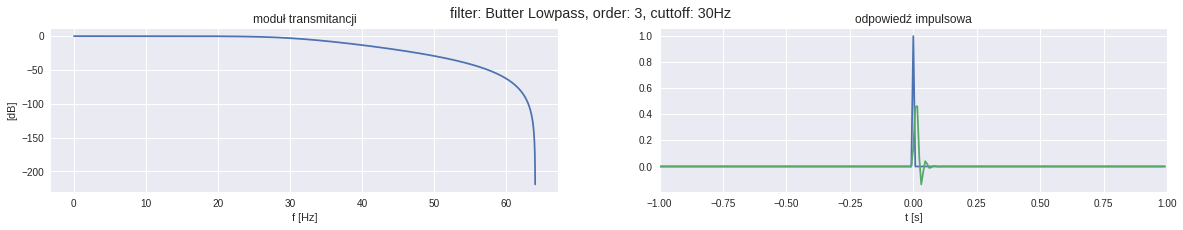

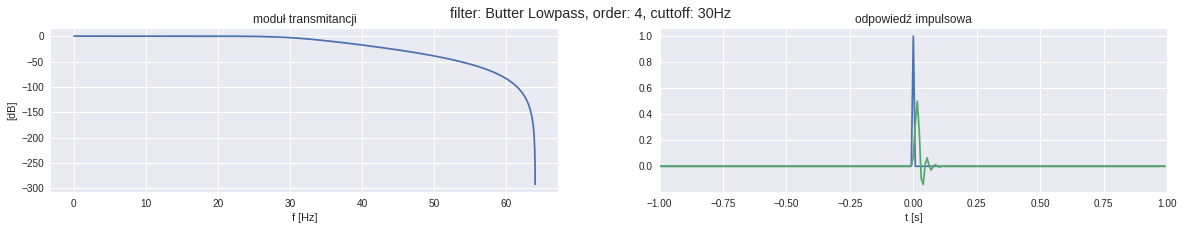

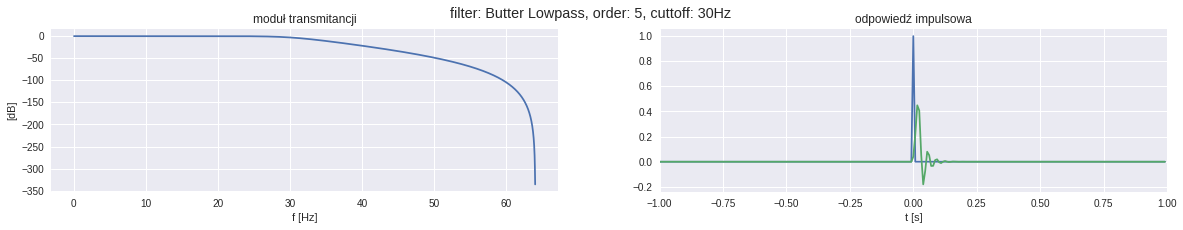

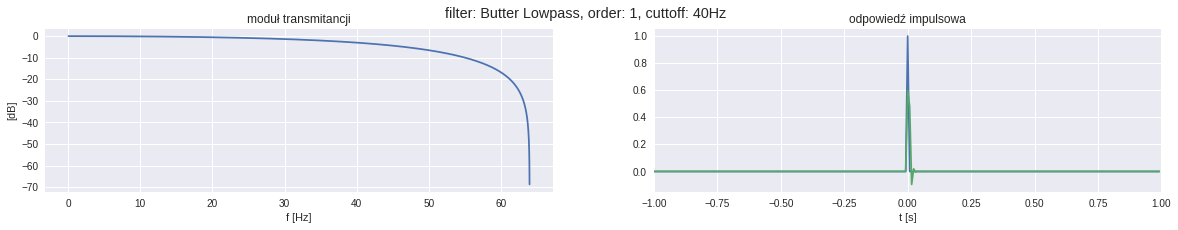

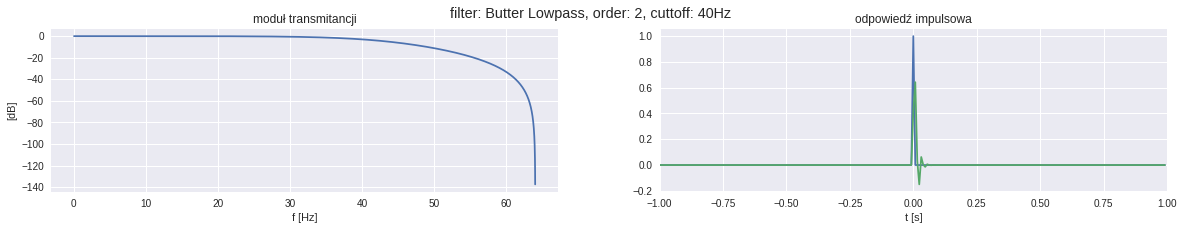

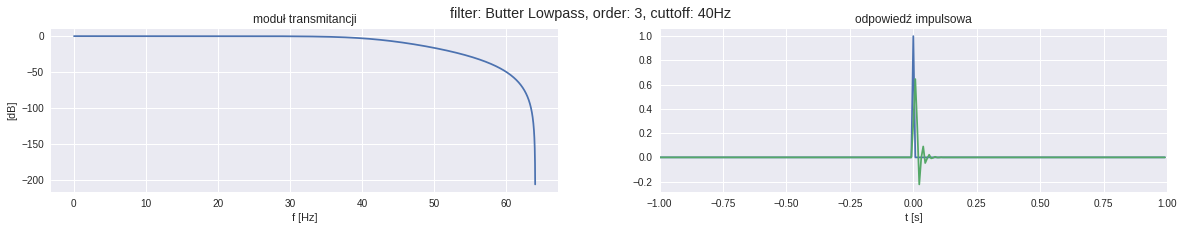

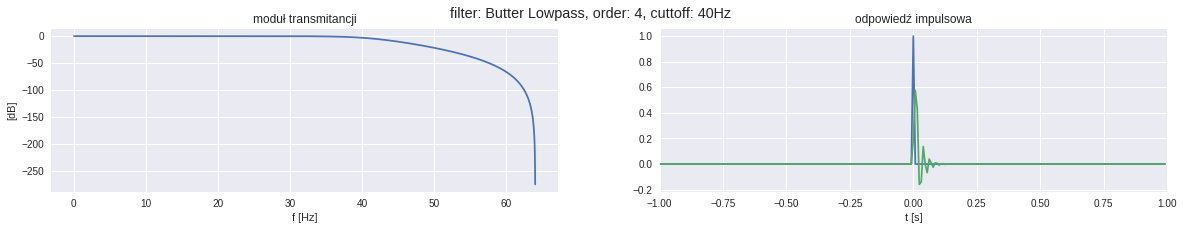

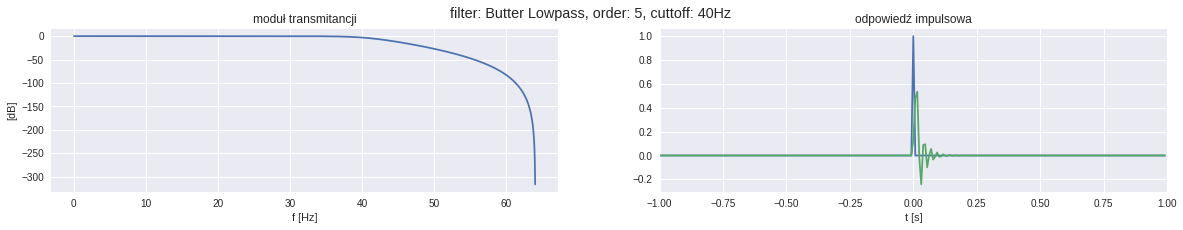

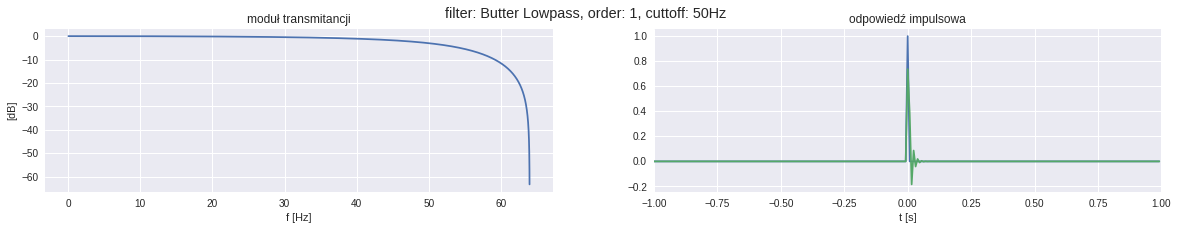

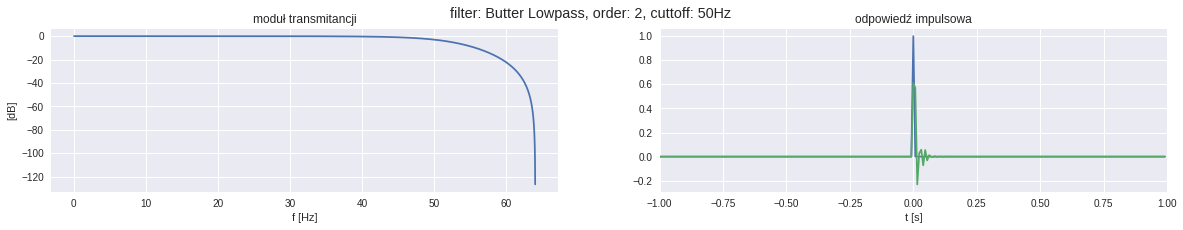

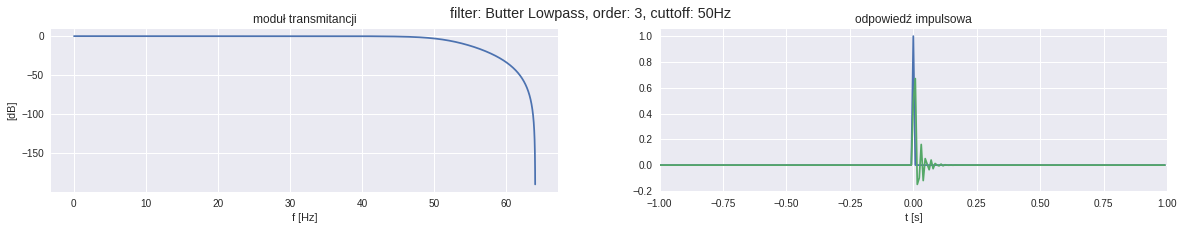

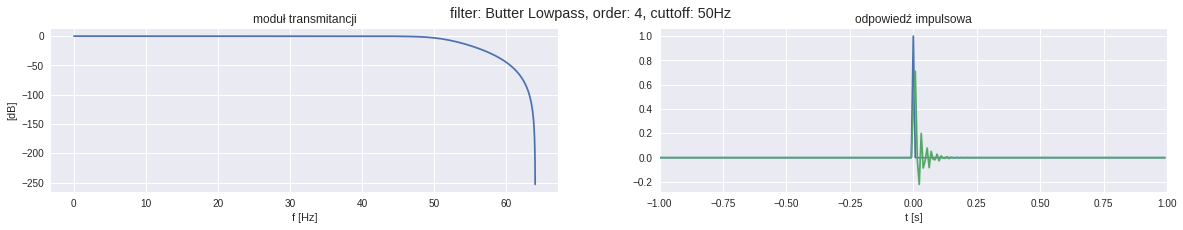

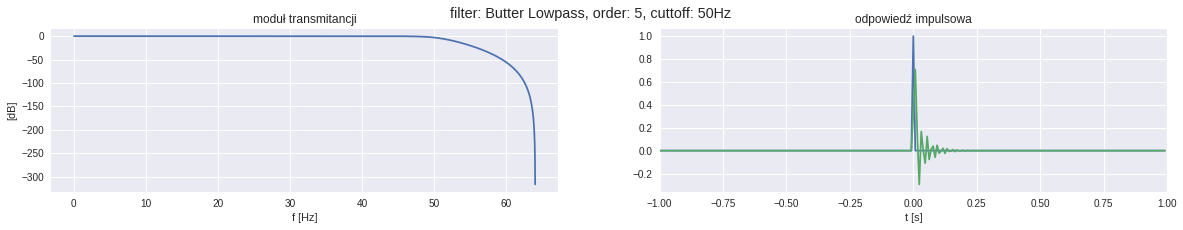

In [24]:
Fs = 128

orders = range(1,6)
cutoffs = [30, 40, 50]
plot_charaktrystkyki(_butter_lowpass, cutoffs, orders)




#### High Pass

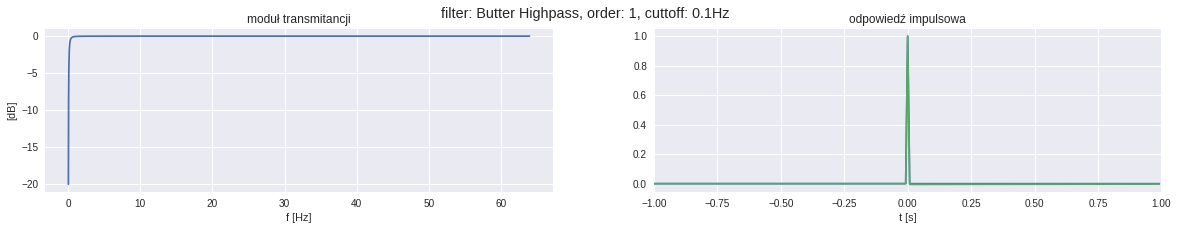

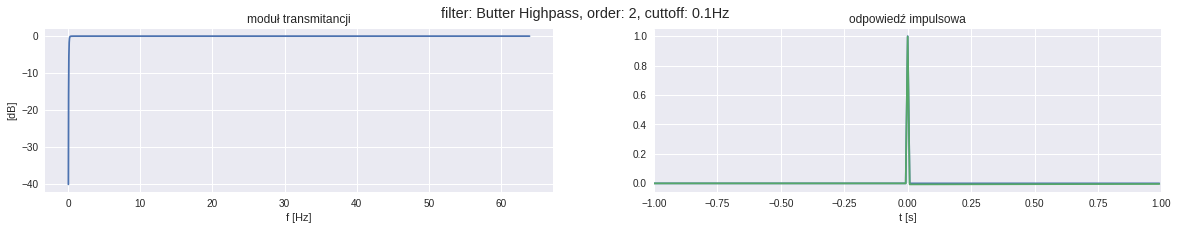

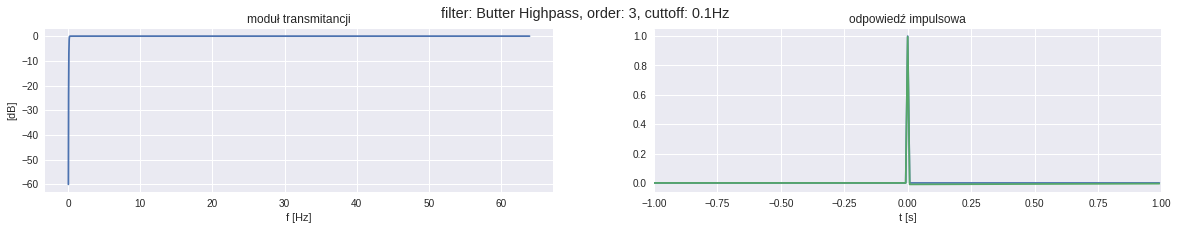

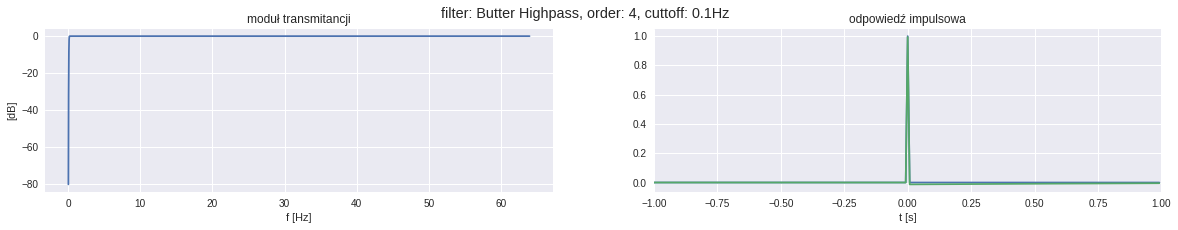

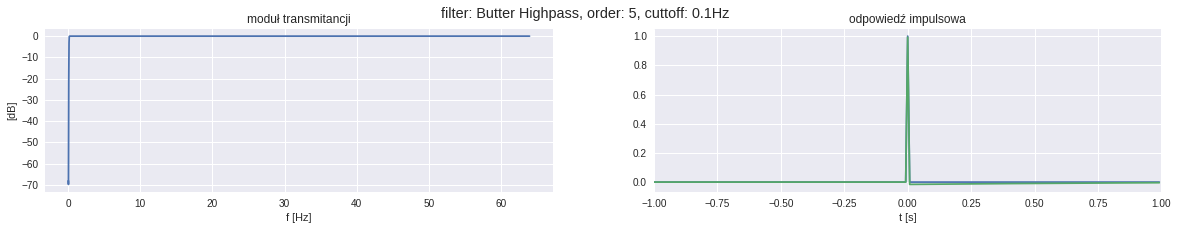

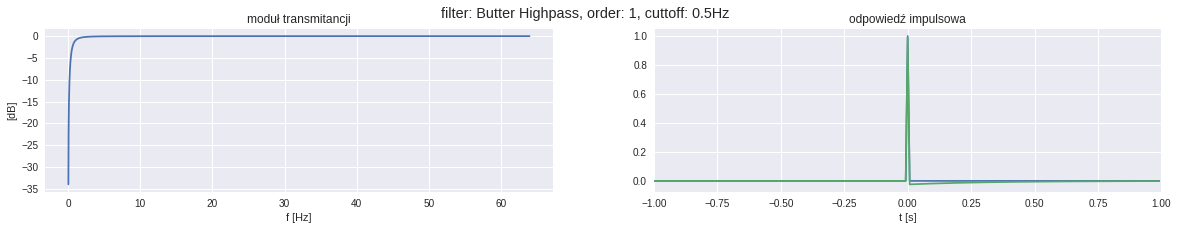

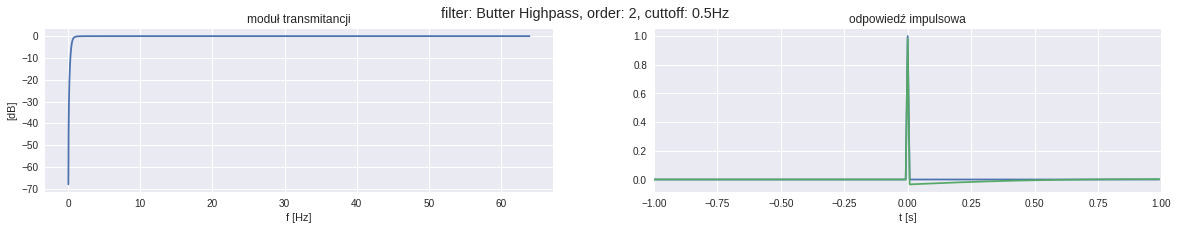

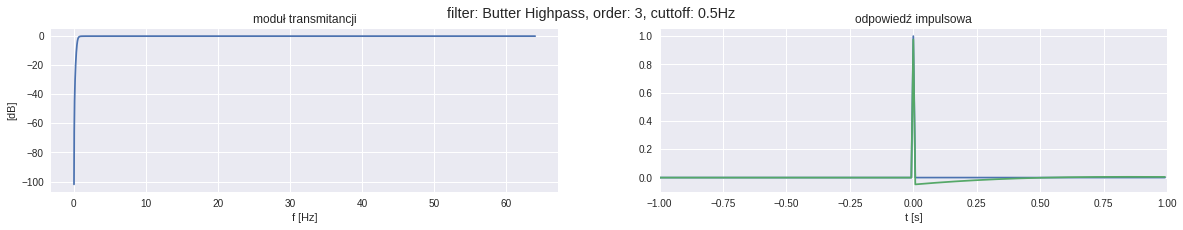

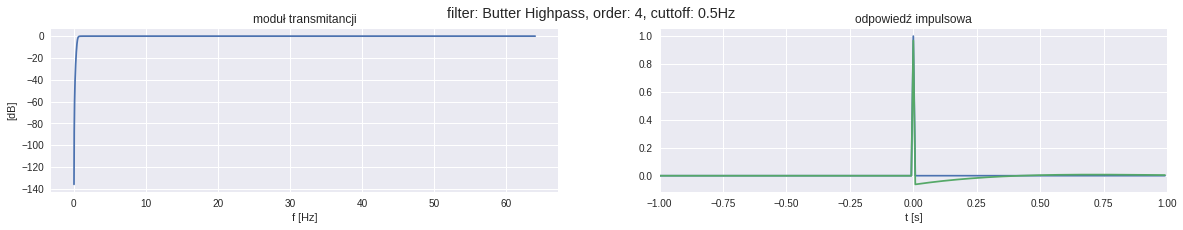

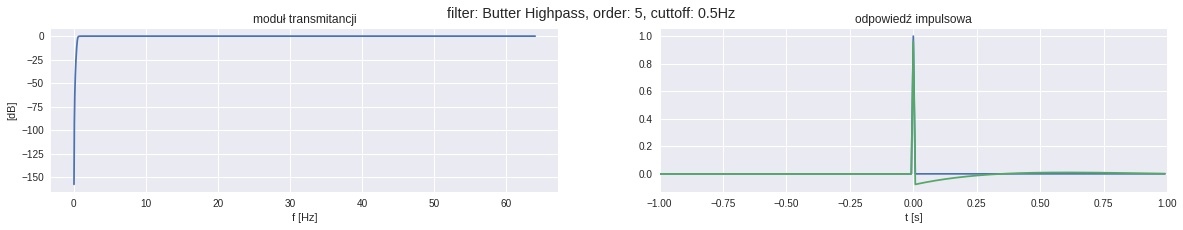

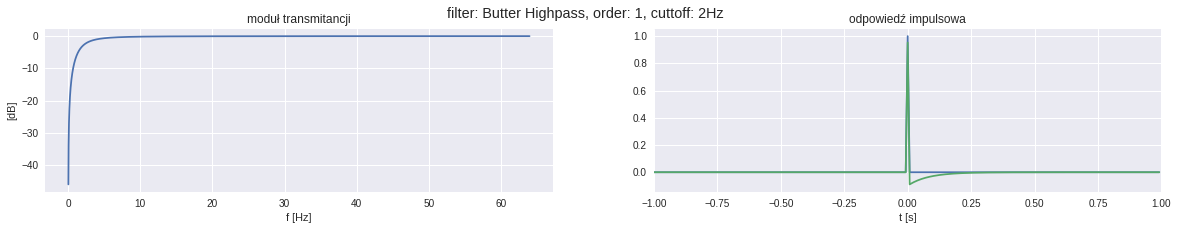

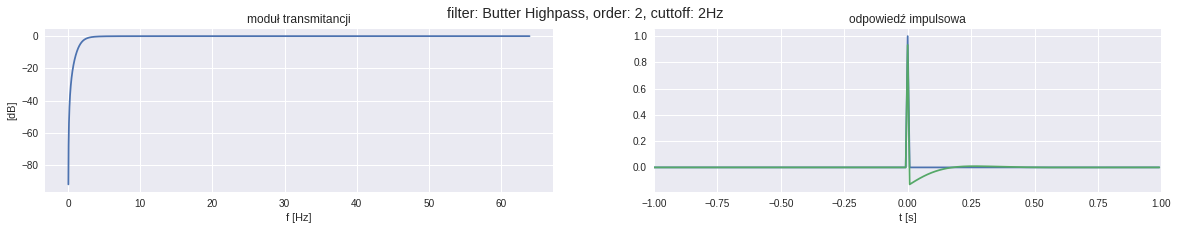

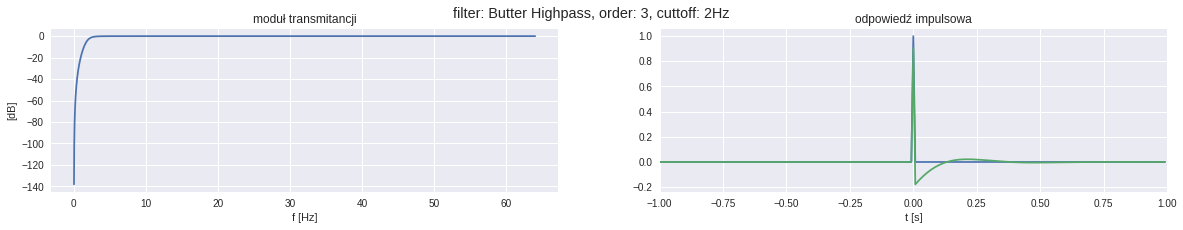

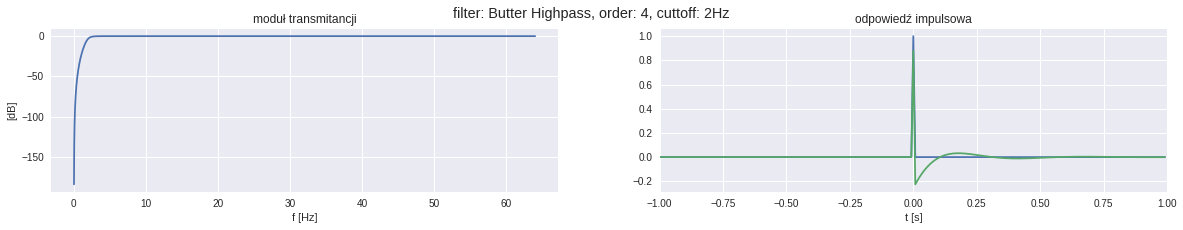

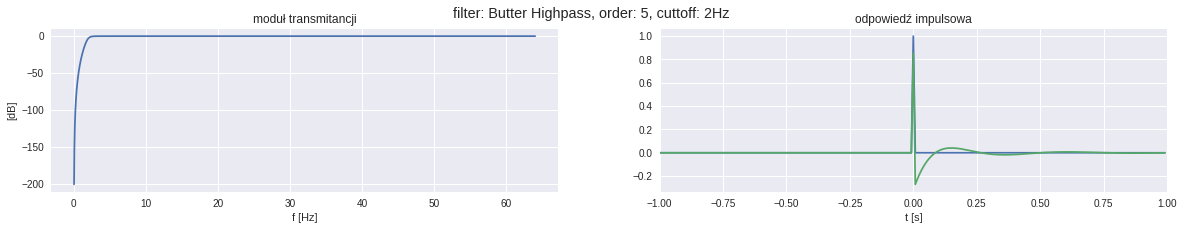

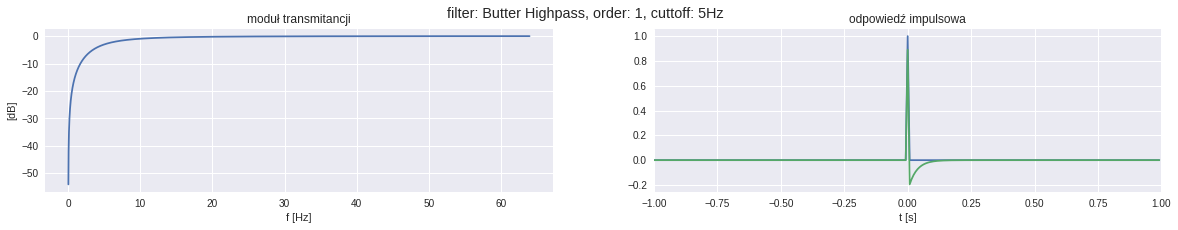

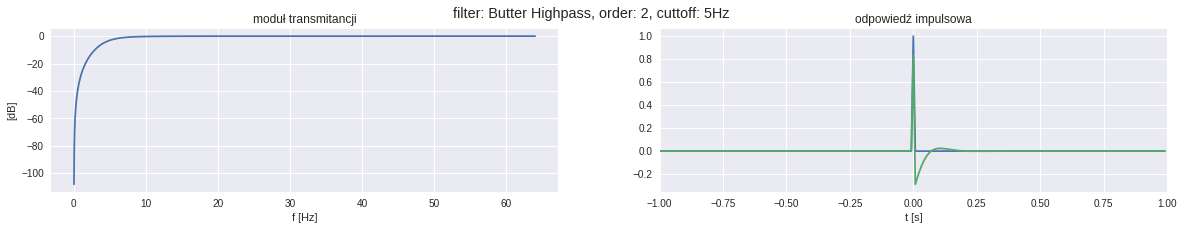

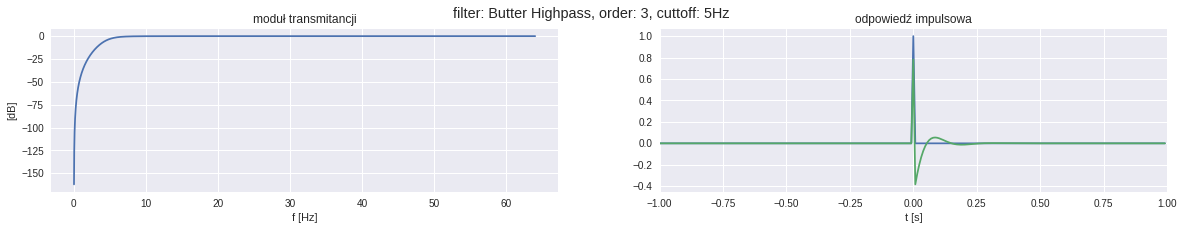

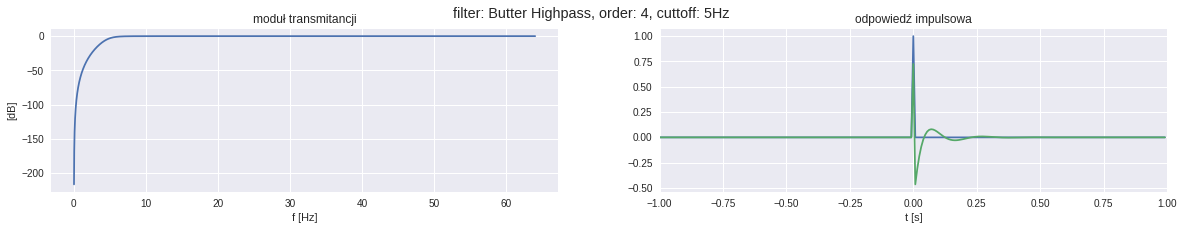

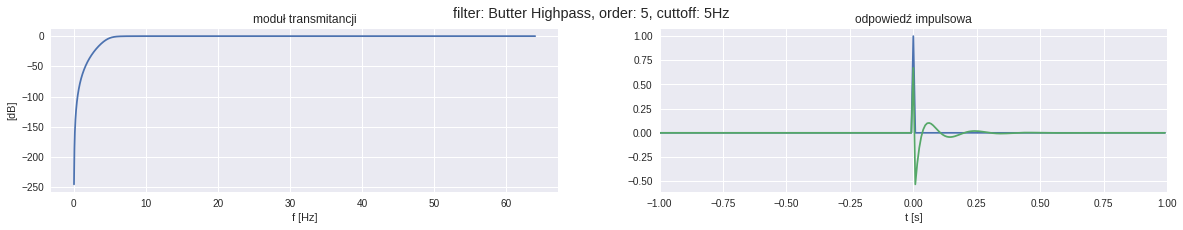

In [37]:
Fs = 128
orders = range(1,6)
cutoffs = [0.1, 0.5, 2, 5 ]
plot_charaktrystkyki(_butter_highpass, cutoffs, orders)

  


#### Notch (Cheby2)

cheby2
[0.7796875, 0.7828125]


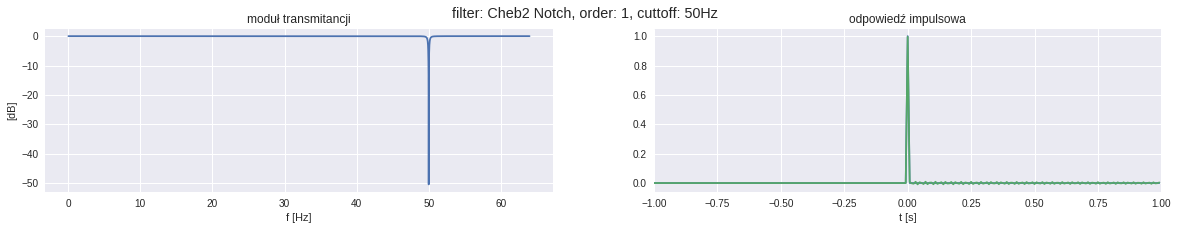

cheby2
[0.7796875, 0.7828125]


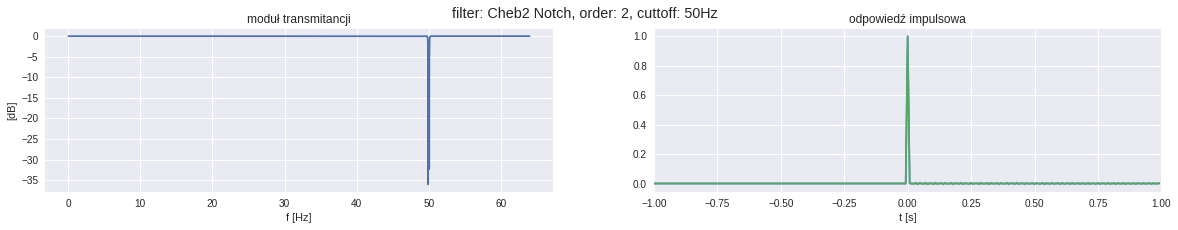

cheby2
[0.7796875, 0.7828125]


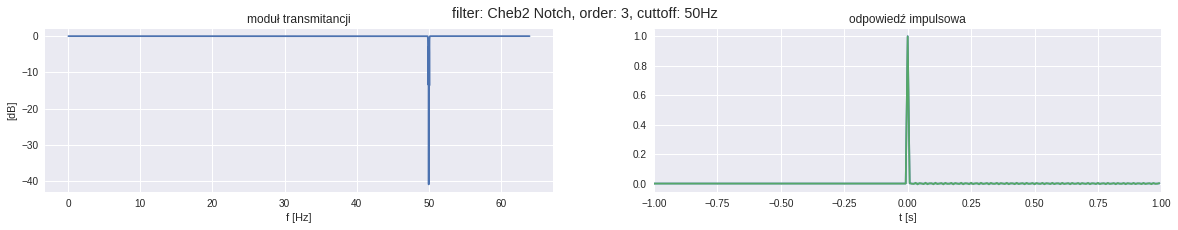

In [11]:
Fs = 128

cutoffs = [50]
orders = range(1,4)

plot_charaktrystkyki(_cheb2_notch, cutoffs, orders)

### Check response on signals

In [0]:
def plot_response(s, t, filter_function, Fs, cutoffs, orders):
  for cutoff, order in itertools.product(cutoffs, orders):

      b, a = filter_function(cutoff, Fs, order)
    
      fig = plt.figure(figsize=(20, 3))
      fig.subplots_adjust(hspace=.5)
      
      for i, _s in enumerate(s):
        fig.add_subplot(1, len(s), i+1)

        y1 = filtfilt(b, a, _s)
        y2 = lfilter(b, a, _s)

        plt.plot(t, _s, label='primary', alpha=0.5, c='k', lw=3)
        plt.plot(t, y1, label='filtfilt', alpha=0.5, c='r')
        plt.plot(t, y2, label='lfilter', alpha=0.5, c='g')

        plt.legend()
        plt.title('G_{}'.format(i+1))
        
      filter_name = filter_function.__name__[1:].replace("_", " ").title()
      plt.suptitle(f'filter: {filter_name}, order: {order}, cuttoff: {cutoff}Hz')
  plt.show()

#### Low Pass

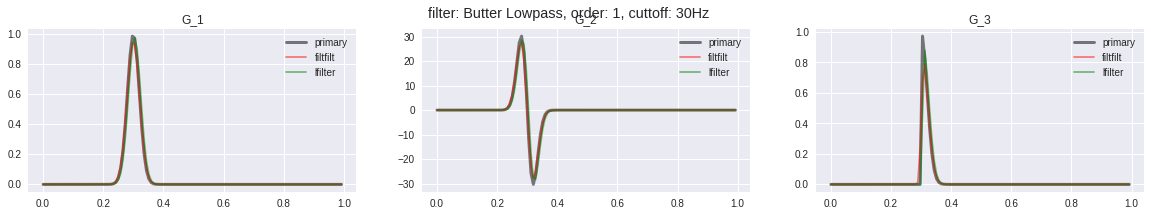

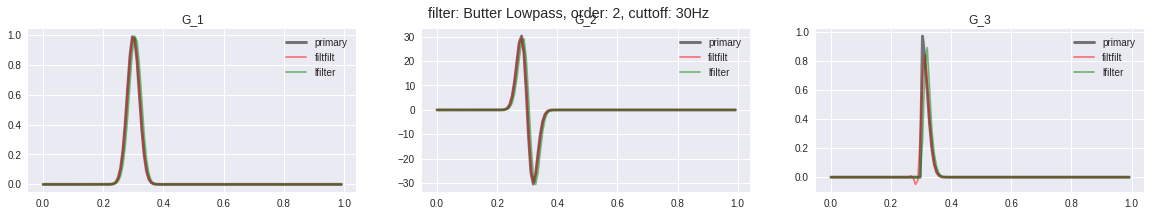

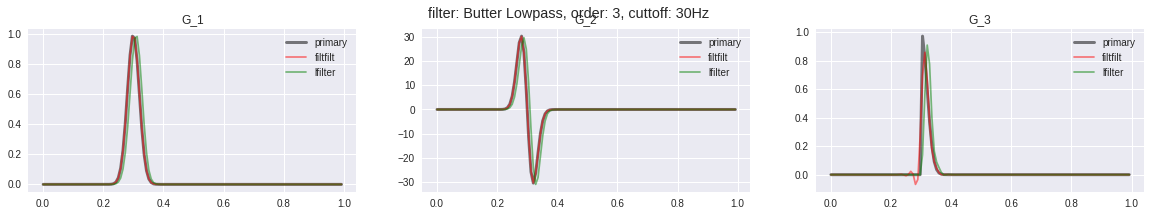

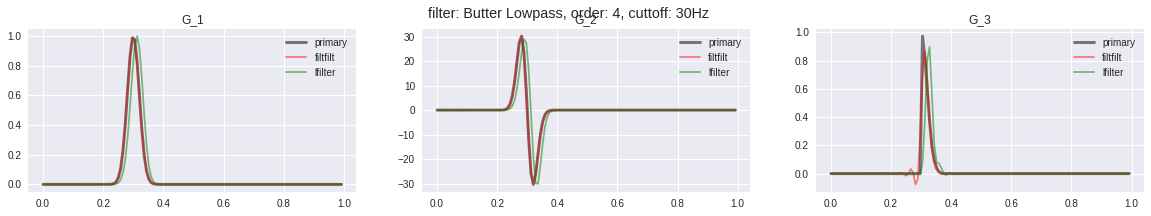

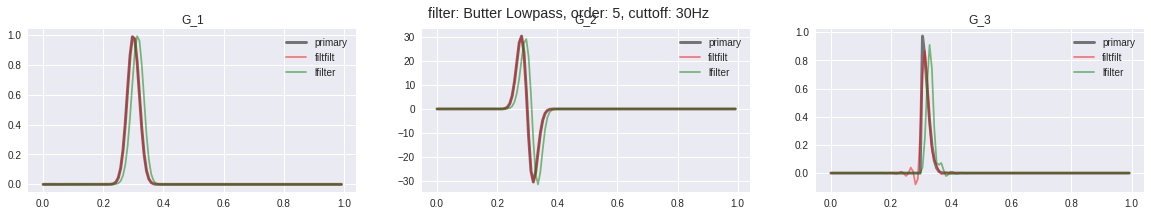

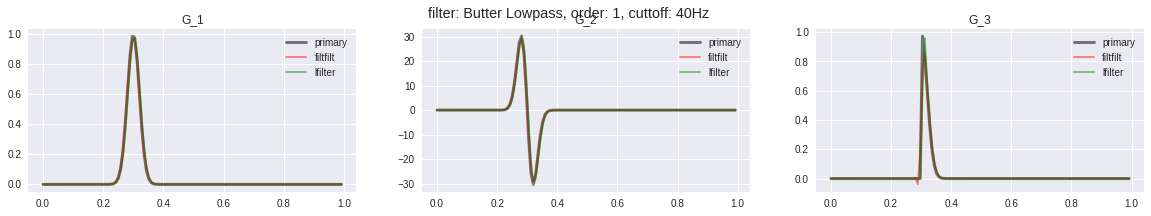

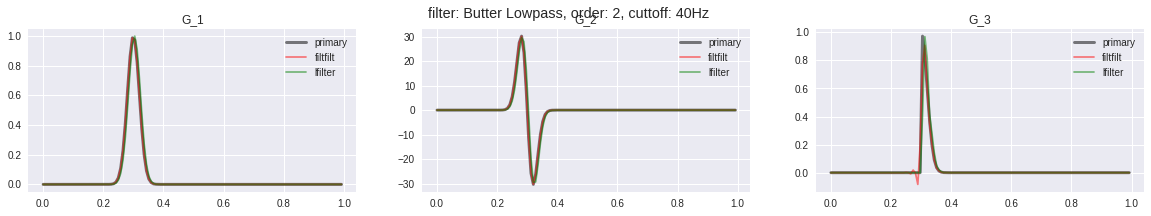

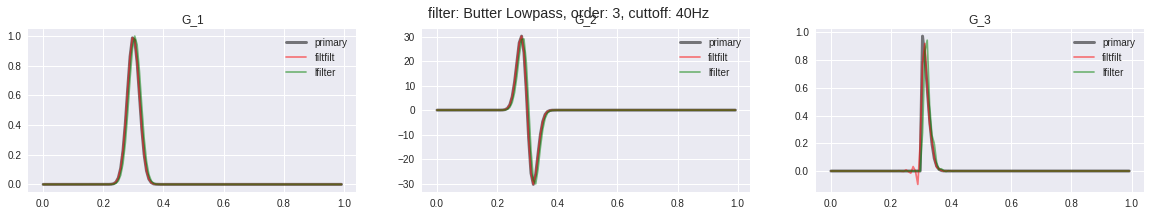

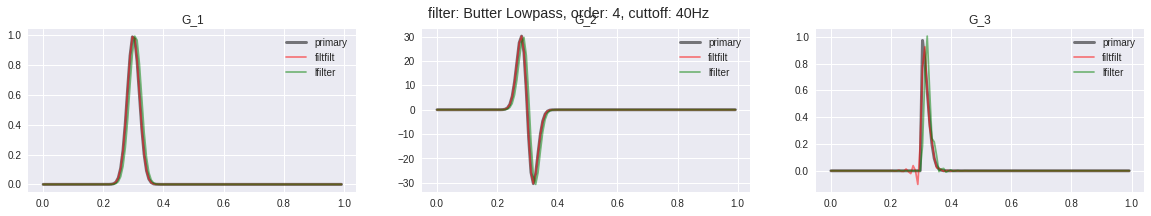

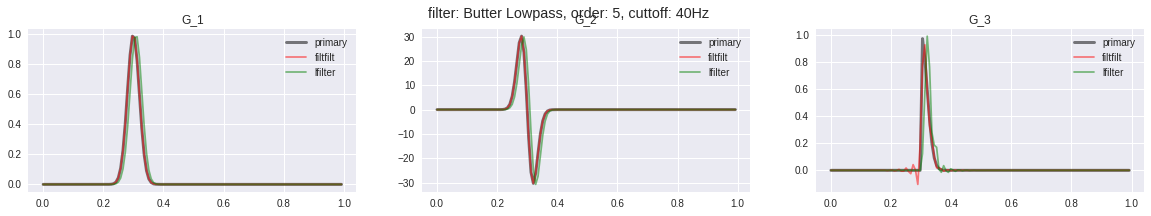

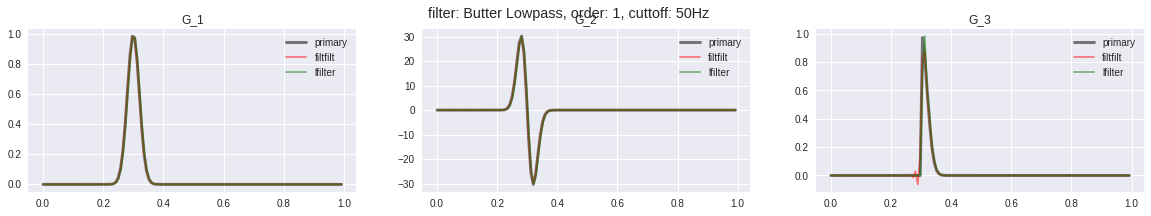

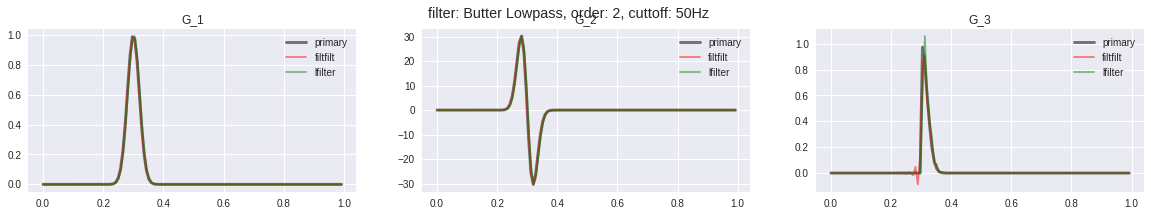

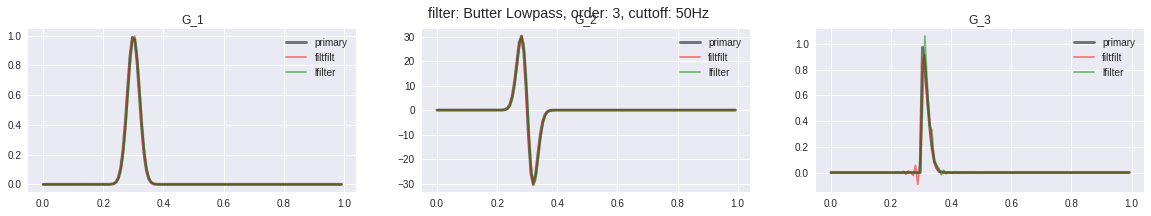

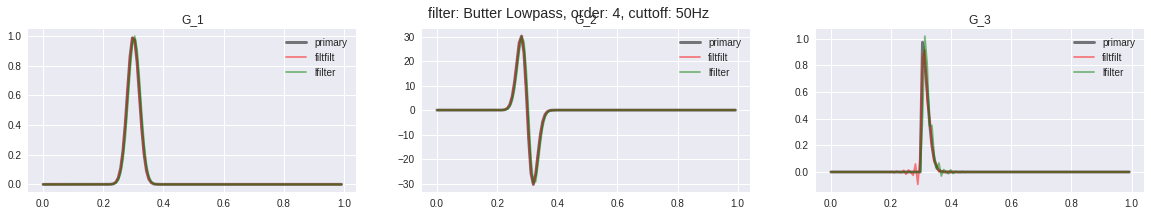

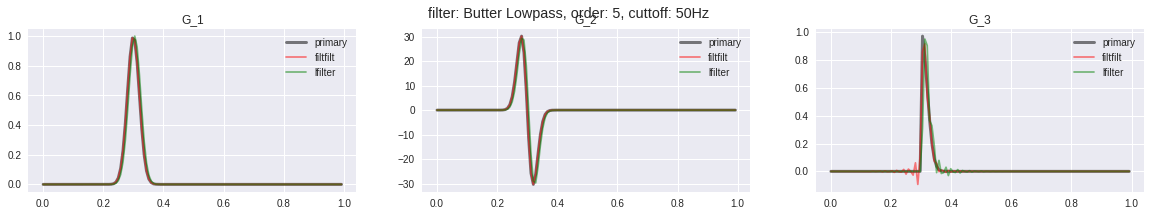

In [141]:
Fs = 128

orders = range(1,6)
cutoffs = [30, 40, 50]

t, s1 = g_1(**params)
t, s2 = g_2(**params)
t, s3 = g_3(**params)

plot_response((s1, s2, s3), t, _butter_lowpass, Fs, cutoffs, orders)

#### High Pass

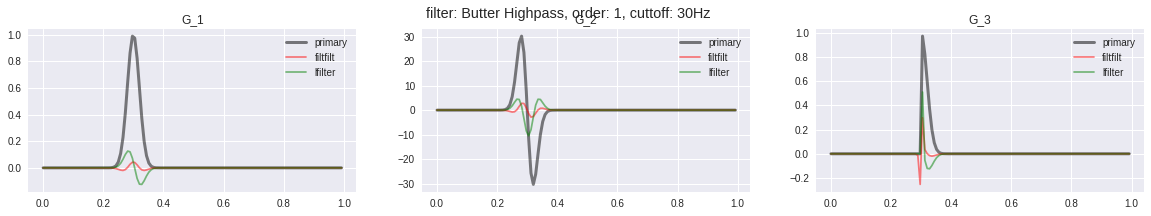

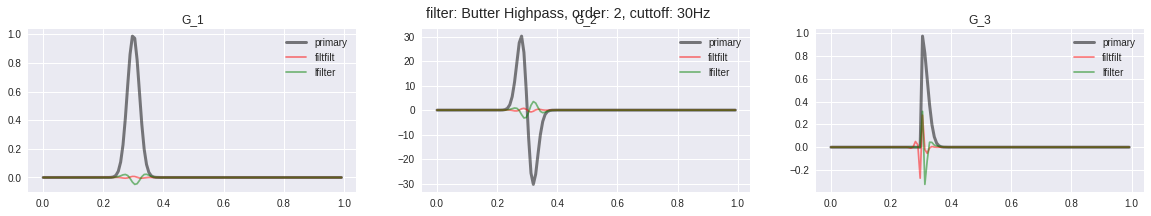

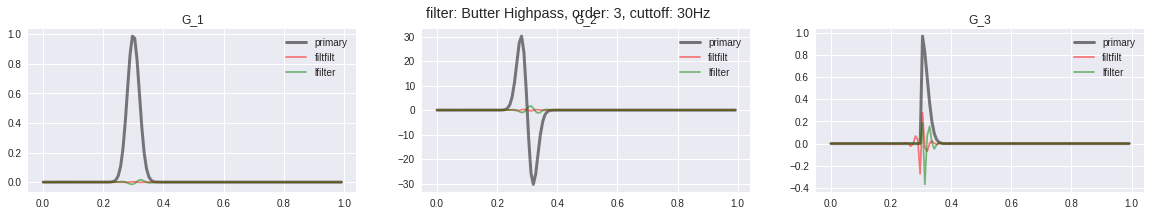

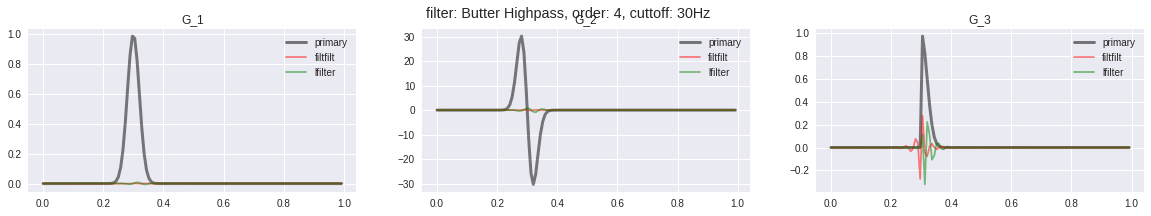

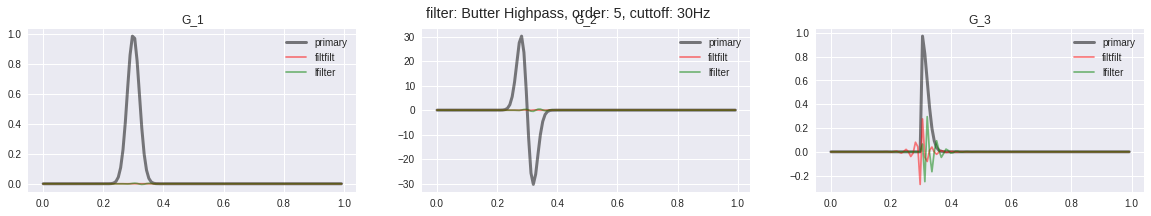

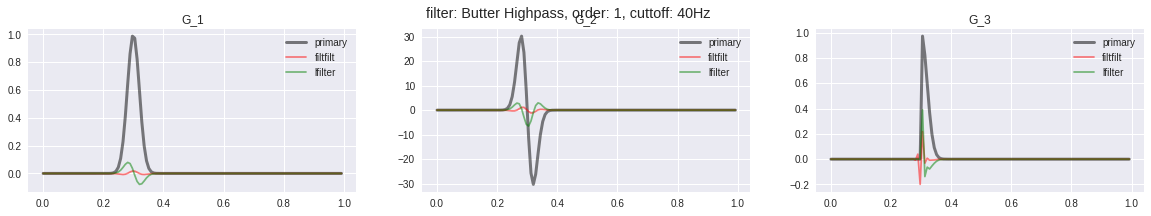

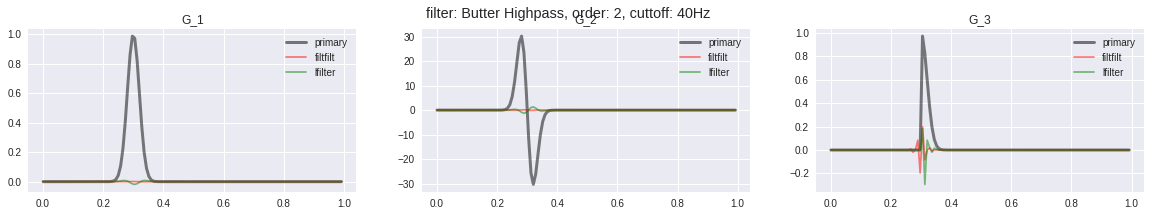

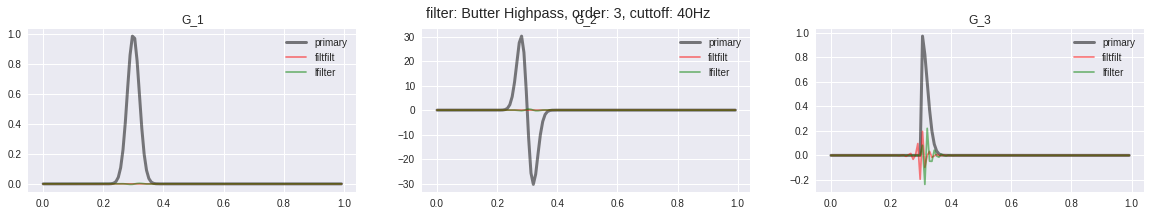

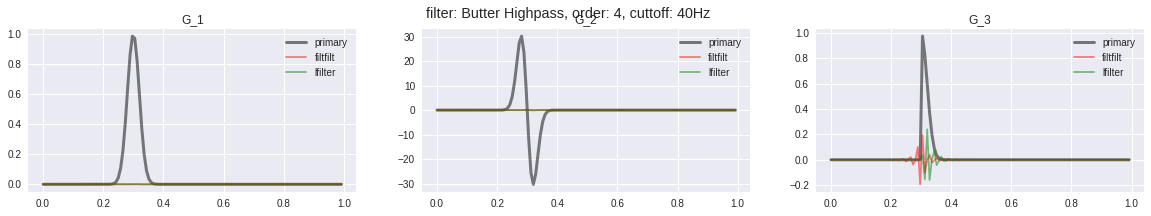

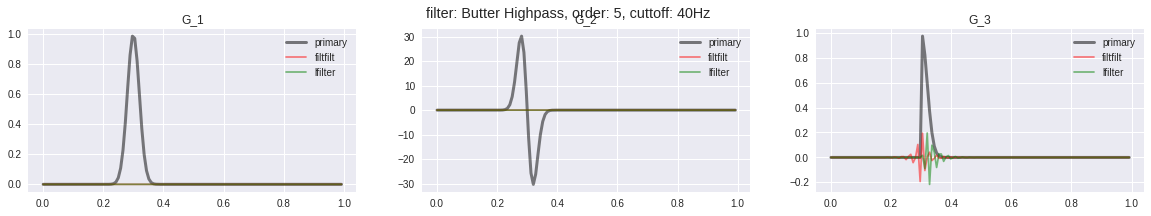

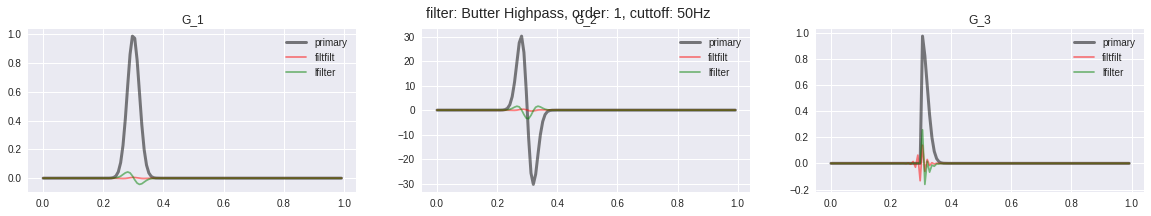

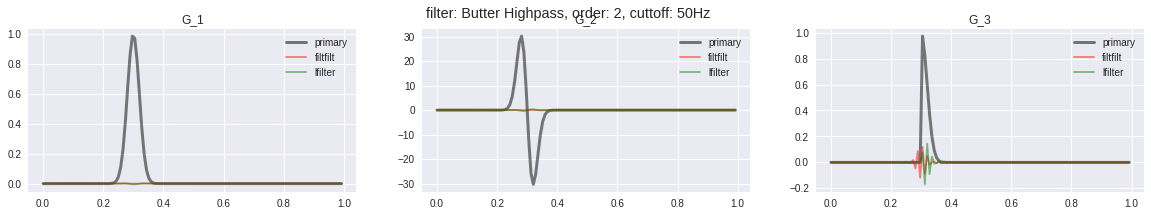

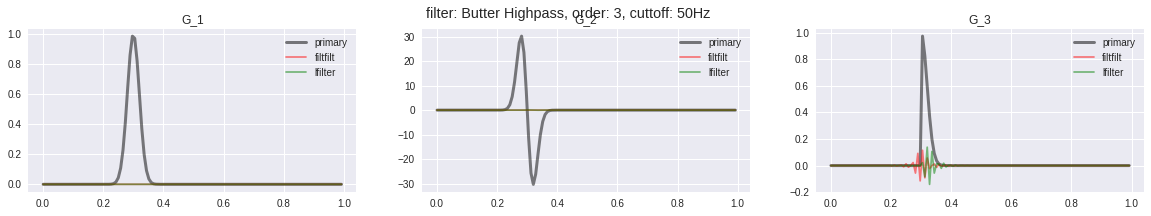

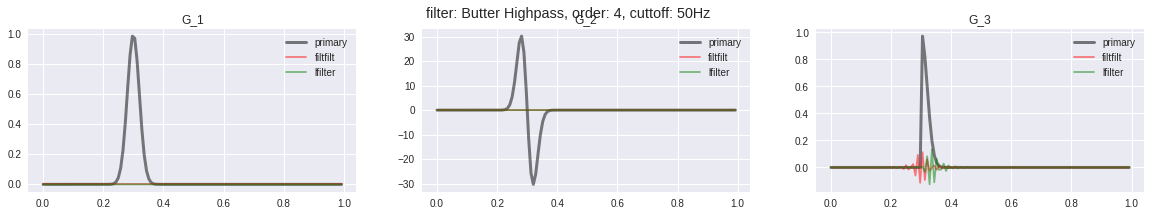

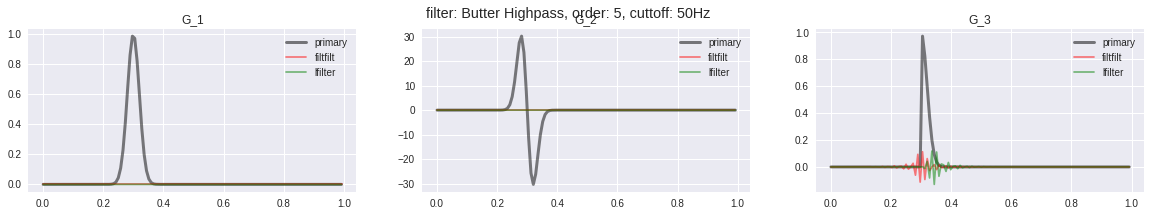

In [142]:
Fs = 128

orders = range(1,6)
cutoffs = [30, 40, 50]

t, s1 = g_1(**params)
t, s2 = g_2(**params)
t, s3 = g_3(**params)

plot_response((s1, s2, s3), t, _butter_highpass, Fs, cutoffs, orders)

#### Notch (Cheby2)

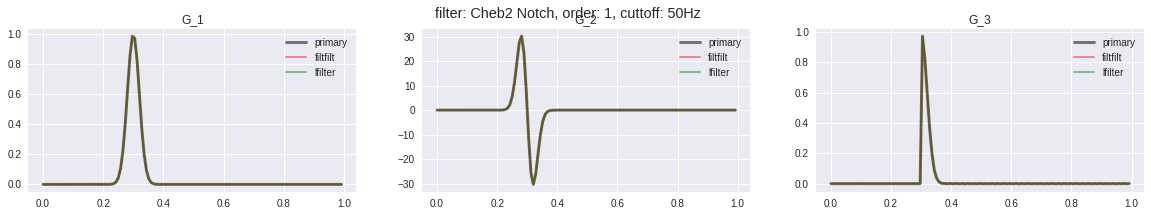

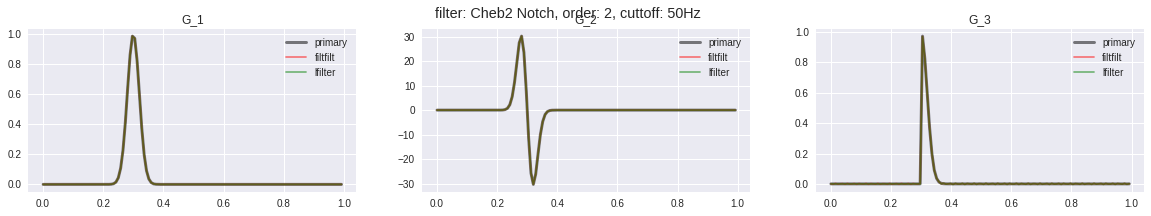

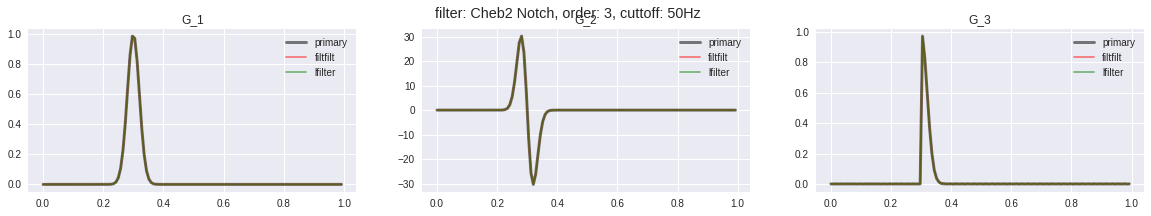

In [174]:
Fs = 128

cutoffs = [50]
orders = range(1,4)

t, s1 = g_1(**params)
t, s2 = g_2(**params)
t, s3 = g_3(**params)

plot_response((s1, s2, s3), t, _cheb2_notch, Fs, cutoffs, orders)

### Sygnał + Szum

In [0]:
def syg_plus_noise(g, N, params):
  x, g = g(**params)
  sims = np.empty((N, len(x)))
  for i in range(N):
    x, g_noise = noise(**params)
    sims[i] = g + g_noise
  return x, sims

In [0]:
def f(t, signals, filter_function, cutoffs, orders, Fs):
  for cutoff, order in itertools.product(cutoffs, orders):

    b, a = filter_function(cutoff, Fs, order)

    fig = plt.figure(figsize=(15, 3))
    fig.subplots_adjust(hspace=.5)
    
    fig.tight_layout()

    for i, signal in enumerate(signals):
      fig.add_subplot(1, len(signals), i+1)

      y = []

      for s in signal:
        y.append(filtfilt(b, a, s))

      y = np.mean(y, axis=0)

      plt.plot(t, np.mean(signal, axis=0), c='k', lw='3', alpha=0.5)
      plt.plot(t, y, c='r', alpha=0.5)
      plt.title('G_{}'.format(i+1))
    filter_name = filter_function.__name__[1:].replace("_", " ").title()
    plt.suptitle(f'filter: {filter_name}, order: {order}, cuttoff: {cutoff}Hz')
  plt.show()   

#### Low Pass

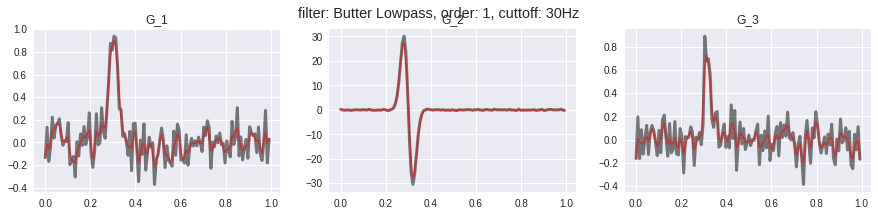

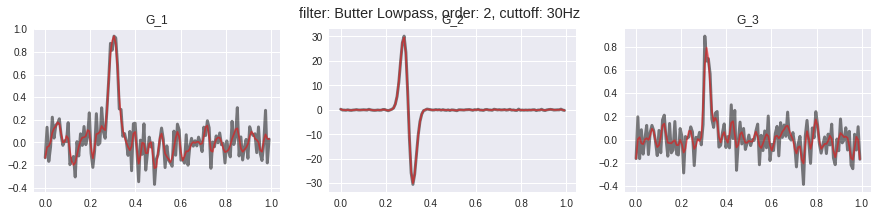

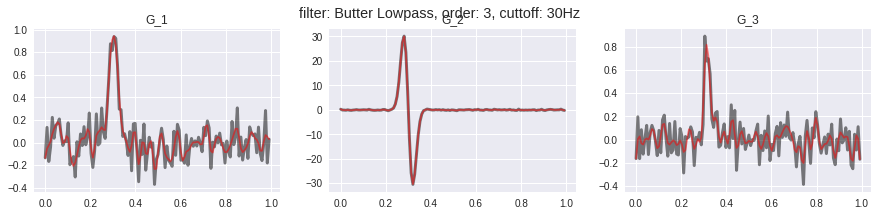

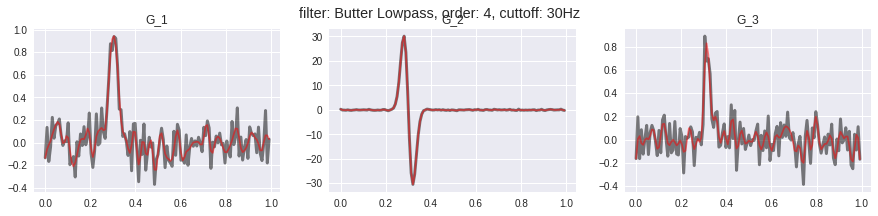

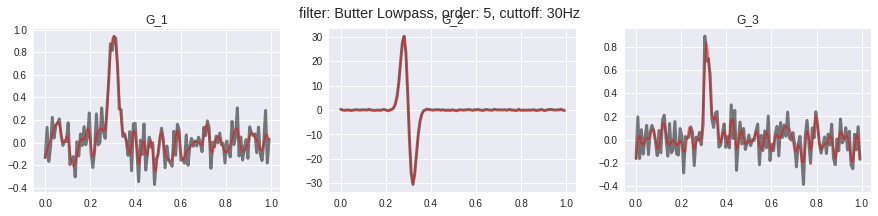

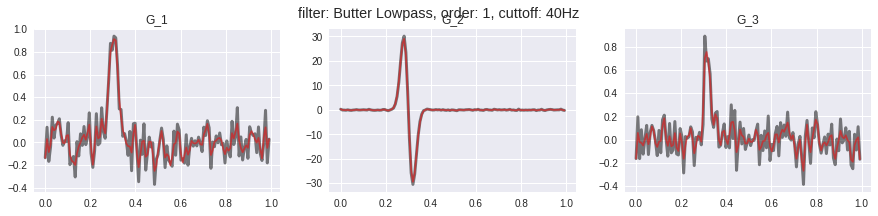

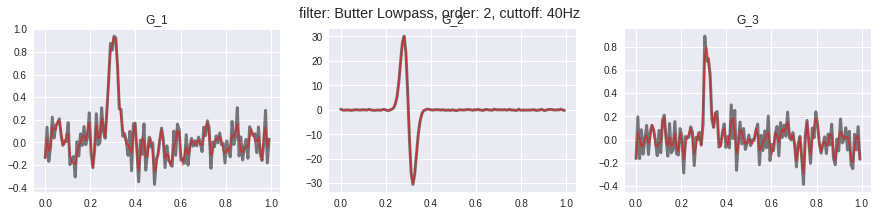

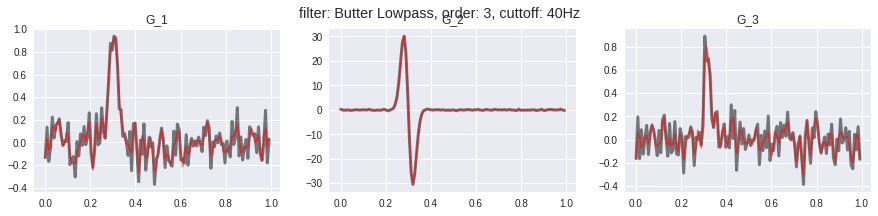

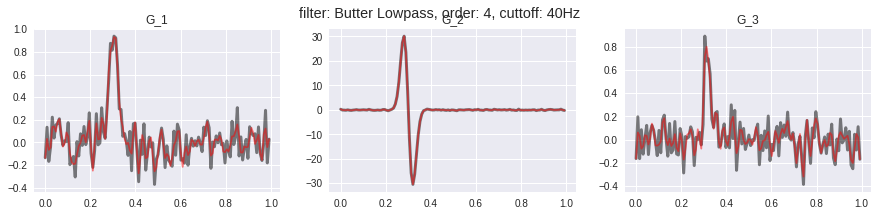

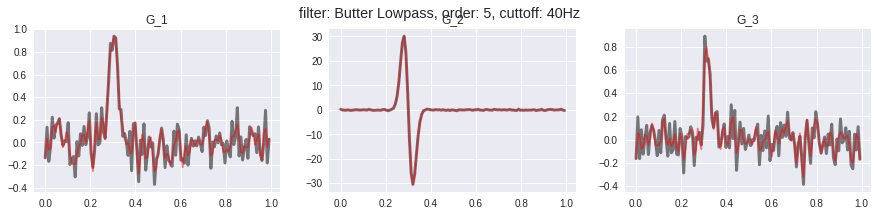

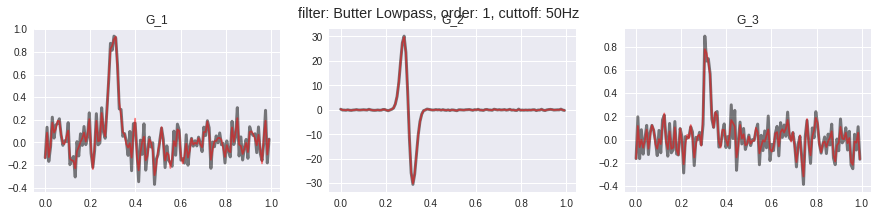

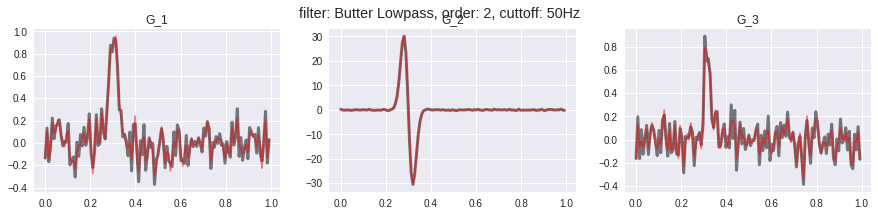

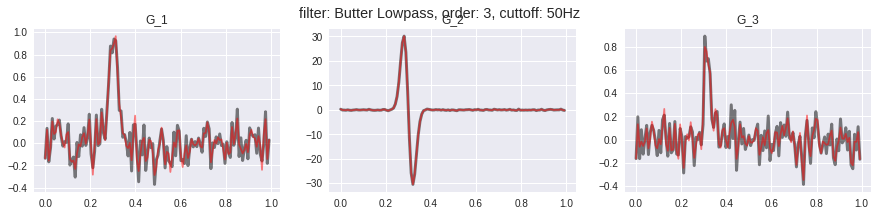

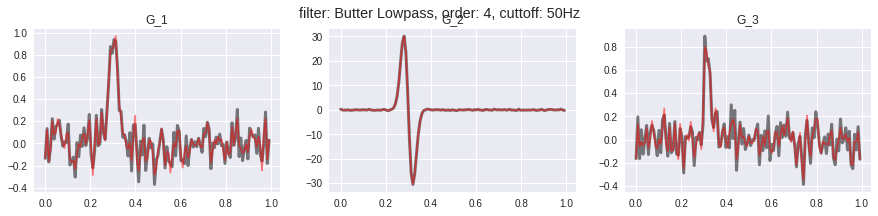

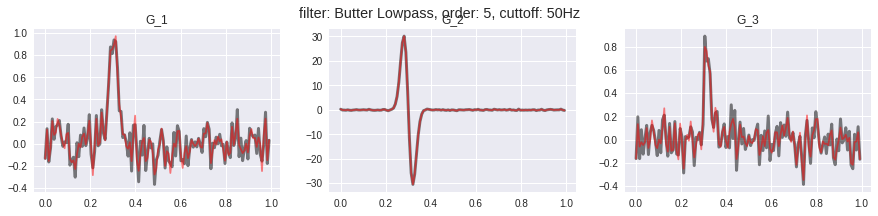

In [182]:
Fs = 128

orders = range(1,6)
cutoffs = [30, 40, 50]

x, signal1 = syg_plus_noise(g_1, 60, params)
x, signal2 = syg_plus_noise(g_2, 60, params)
x, signal3 = syg_plus_noise(g_3, 60, params)

f(x, (signal1, signal2, signal3), _butter_lowpass, cutoffs, orders, Fs)

#### High Pass

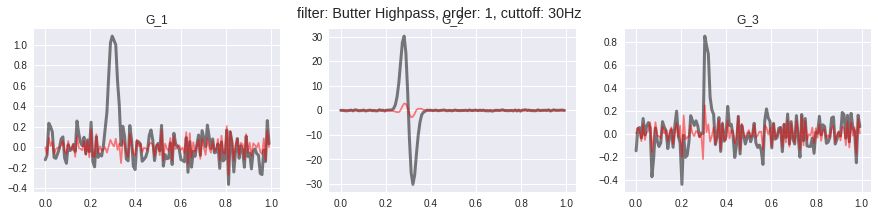

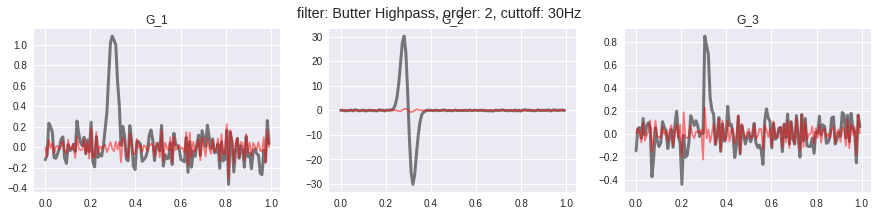

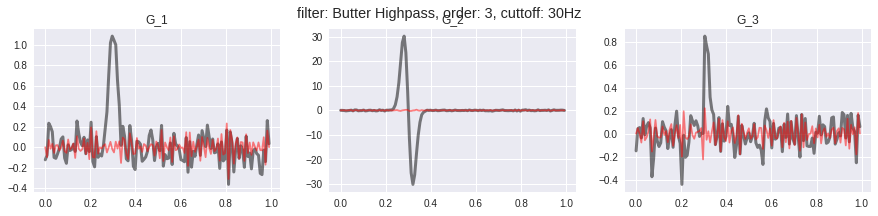

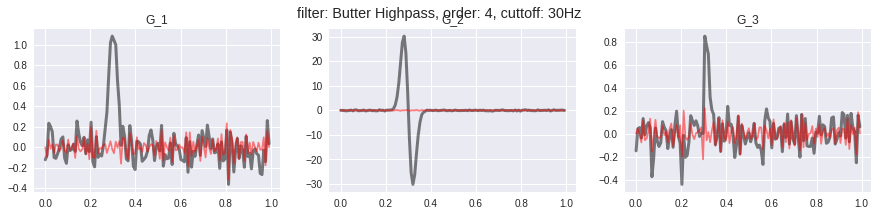

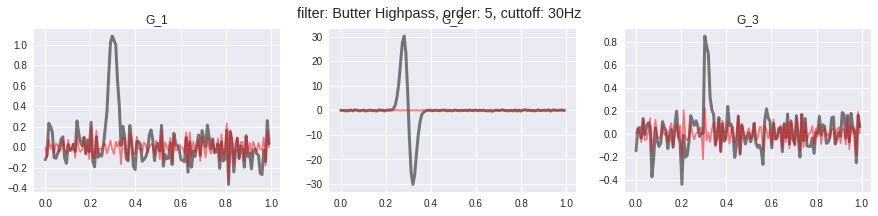

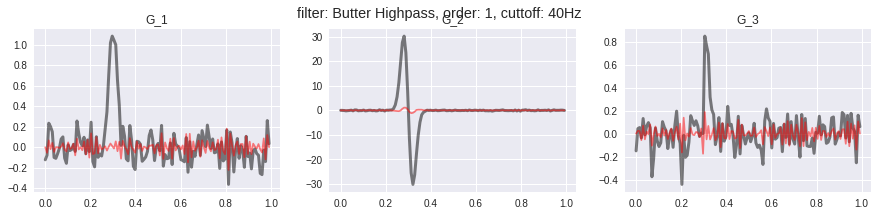

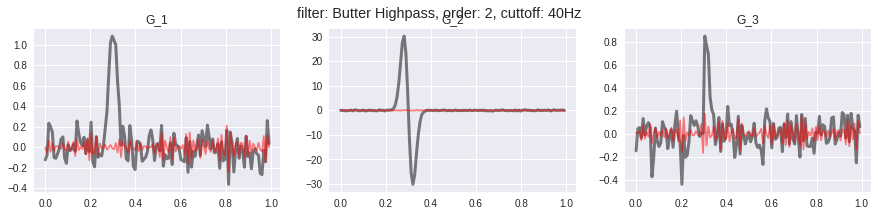

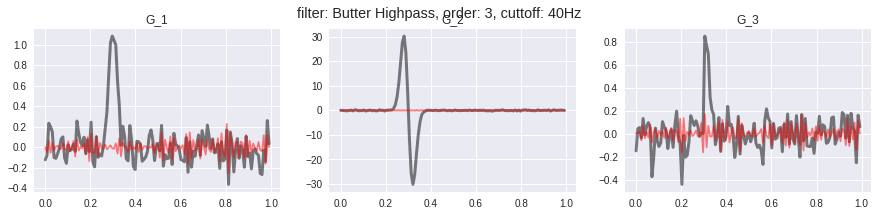

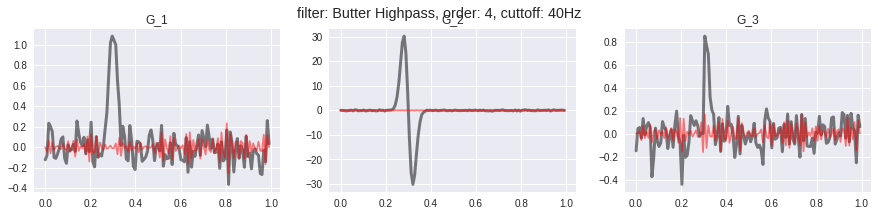

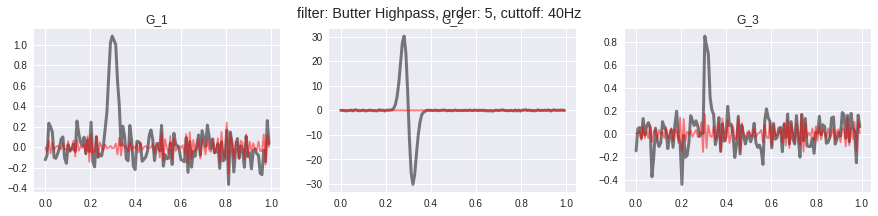

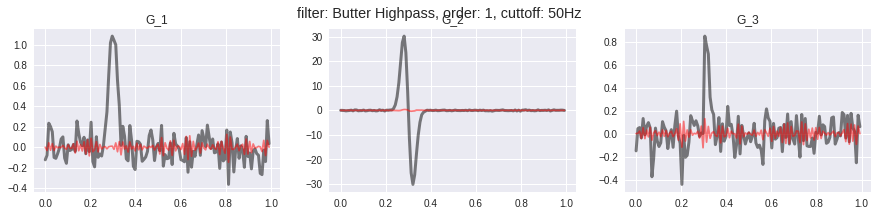

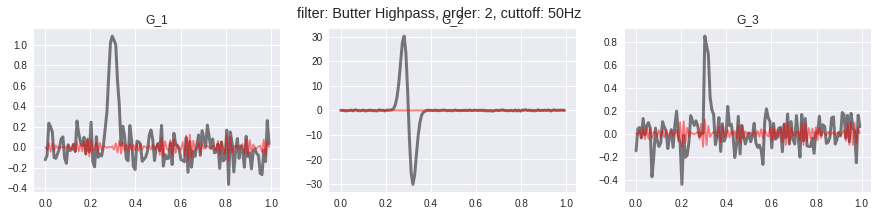

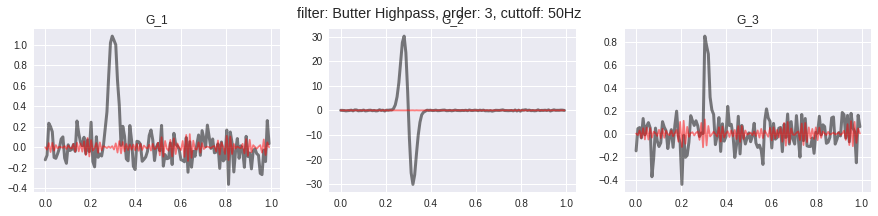

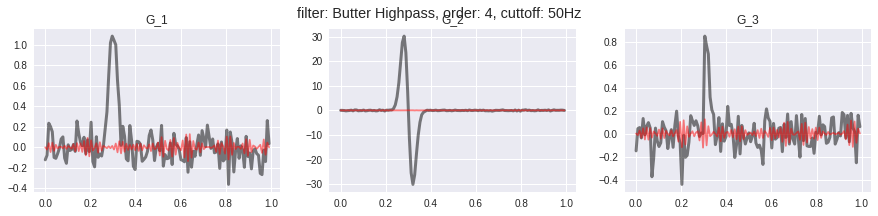

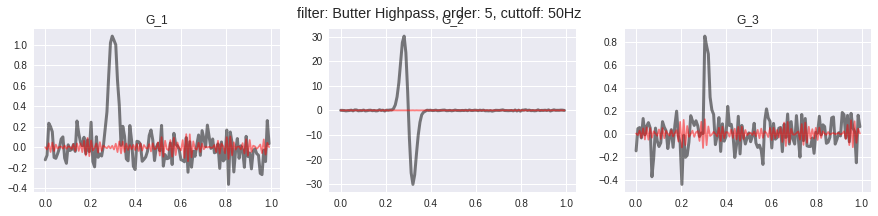

In [179]:
Fs = 128

orders = range(1,6)
cutoffs = [30, 40, 50]

x, signal1 = syg_plus_noise(g_1, 60, params)
x, signal2 = syg_plus_noise(g_2, 60, params)
x, signal3 = syg_plus_noise(g_3, 60, params)

f(x, (signal1, signal2, signal3), _butter_highpass, cutoffs, orders, Fs)

#### Notch (Cheby2)

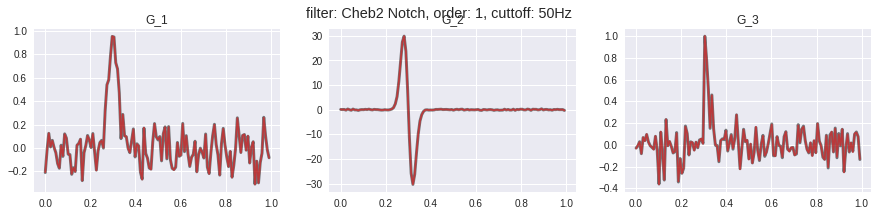

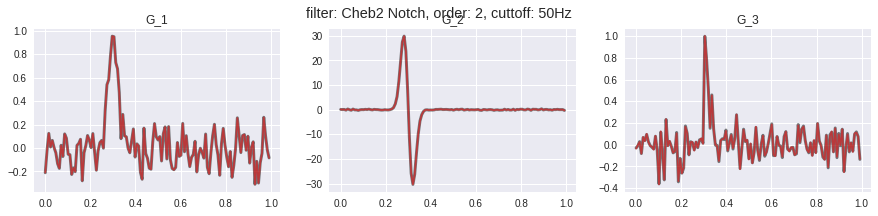

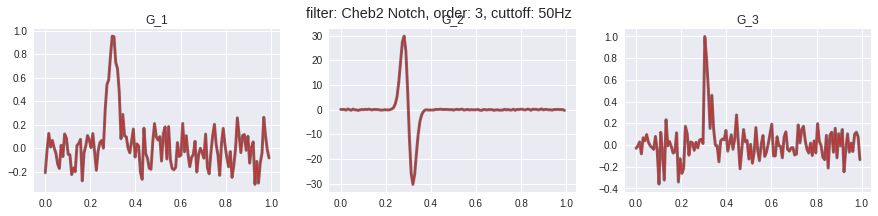

In [180]:
Fs = 128

cutoffs = [50]
orders = range(1,4)

x, signal1 = syg_plus_noise(g_1, 60, params)
x, signal2 = syg_plus_noise(g_2, 60, params)
x, signal3 = syg_plus_noise(g_3, 60, params)

f(x, (signal1, signal2, signal3), _cheb2_notch, cutoffs, orders, Fs)